#### Importing the Necessary Python Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings("ignore")
from scipy.stats import stats


#### Business Problem:

To ensure there is no discrimination between employees, it is imperative for the Human Resources department of Delta Ltd. to maintain a salary range for each employee with similar profiles
Apart from the existing salary, there is a considerable number of factors regarding an employee’s experience and other abilities to which they get evaluated in interviews. Given the data related to individuals who applied in Delta Ltd, models can be built that can automatically determine salary which should be offered if the prospective candidate is selected in the company. This model seeks to minimize human judgment with regard to salary to be offered.

##### Goal & Objective: The objective of this exercise is to build a model, using historical data that will determine an employee's salary to be offered, such that manual judgments on selection are minimized. It is intended to have a robust approach and eliminate any discrimination in salary among similar employee profiles

###  Exploratory Data Analysis (EDA) - 

#### getting the csv file

In [2]:
df=pd.read_csv("expected_ctc.csv")

#### Head / top five rows of the dataframe

In [3]:
df.head()

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,1,22753,0,0,NaN,NaN,NaN,NaN,NaN,PG,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,2,51087,23,14,HR,Consultant,Analytics,H,HR,Doctorate,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,3,38413,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,4,11501,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,5,58941,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


#### Tail Last five rows of the dataframe

In [4]:
df.tail()

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
24995,24996,25550,18,13,Engineering,Project Manager,Automobile,I,Assistant Manager,PG,...,Kanpur,Mumbai,3410899,N,B,3,6,0,0,4434168
24996,24997,53442,12,8,HR,Others,Analytics,B,Sr.Manager,Under Grad,...,Bangalore,Nagpur,1350793,Y,B,6,7,0,0,1756030
24997,24998,15777,22,8,Banking,Head,Insurance,D,Software Developer,Under Grad,...,Pune,Delhi,1681796,N,C,4,5,2,0,1934065
24998,24999,57616,25,8,Marketing,CEO,BFSI,D,Marketing Manager,PG,...,Delhi,Pune,3311090,Y,B,3,1,1,0,4370638
24999,25000,20788,8,0,Banking,Consultant,Automobile,P,Sr.Manager,Grad,...,Surat,Mangalore,935897,N,A,2,6,0,0,1216666


#### Lets have a look on the Data Dictionary of the Business Problem.

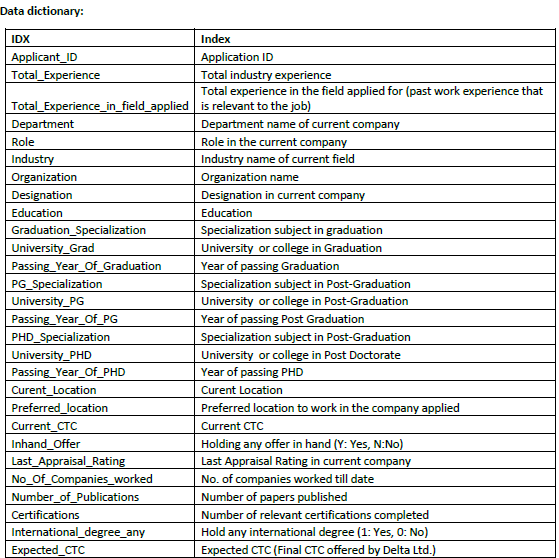

In [5]:
from IPython.display import Image
Image(filename="Data_Dictionary_HR.png")

####  checking the five point summary of the dataframe min,max,mean,std,median.

In [6]:
df.describe(include="all")

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
count,25000.000000,25000.000000,25000.000000,25000.000000,22222,24037,24092,24092,21871,25000,...,25000,25000,2.500000e+04,25000,24092,25000.000000,25000.000000,25000.000000,25000.000000,2.500000e+04
unique,NaN,NaN,NaN,NaN,12,24,11,16,18,4,...,15,15,NaN,2,5,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Marketing,Others,Training,M,HR,PG,...,Bangalore,Kanpur,NaN,N,B,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,2379,2248,2237,1574,1648,6326,...,1742,1720,NaN,17418,5501,NaN,NaN,NaN,NaN,NaN
mean,12500.500000,34993.240080,12.493080,6.258200,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.760945e+06,NaN,NaN,3.482040,4.089040,0.773680,0.081720,2.250155e+06
std,7217.022701,14390.271591,7.471398,5.819513,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.202125e+05,NaN,NaN,1.690335,2.606612,1.199449,0.273943,1.160480e+06
min,1.000000,10000.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000e+00,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2.037440e+05
25%,6250.750000,22563.750000,6.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.027312e+06,NaN,NaN,2.000000,2.000000,0.000000,0.000000,1.306278e+06
50%,12500.500000,34974.500000,12.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.802568e+06,NaN,NaN,3.000000,4.000000,0.000000,0.000000,2.252136e+06
75%,18750.250000,47419.000000,19.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.443883e+06,NaN,NaN,5.000000,6.000000,1.000000,0.000000,3.051354e+06


#### Insights
* From the above table we can infer the count,mean, std , 25% , 50% ,75% and min & max values of the all numeric variables present in the dataset.


* From the above table we can infer the count,unique,top,freq of all the categorical variables present in the dataset.


#### getting the info of the dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

### Insights
* From the above results we can see that there is null values present in the many column of the dataset.

* Their are total 25000 rows & 29 columns in this dataset,indexed from 0 to 24999. 

* Out of 10 variables 3 are float64 , 16 variables are object and 10 variable is int64.

* Memory used by the dataset: 5.5+ MB.

#### There is a miss spell word of Curent_Location so we have to change the column name

In [8]:
df.rename(columns = {'Curent_Location':'Current_Location'}, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

#### we have Successfully change  the Column Name Curent_Location to Current_Location.

#### checking shape of the dataframe

In [10]:
df.shape

(25000, 29)

###  Insights

* Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. 

* The data set has 25000 observations (rows) and 29 variables (columns) in the dataset.

#### Now we drop unwanted column from the dataframe.

In [11]:
df.drop(["IDX", "Applicant_ID"], axis = 1, inplace = True)

#### After dropping the unwanted column check the top 5 rows of the dataset

In [12]:
df.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,...,Current_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,NaN,NaN,NaN,NaN,NaN,PG,Arts,Lucknow,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,23,14,HR,Consultant,Analytics,H,HR,Doctorate,Chemistry,Surat,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,Zoology,Jaipur,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,Others,Bangalore,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,Zoology,Mumbai,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


In [13]:
### Fiunstion that display For all column from starting to end
pd.options.display.max_columns = None

In [14]:
df.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,PG_Specialization,University_PG,Passing_Year_Of_PG,PHD_Specialization,University_PHD,Passing_Year_Of_PHD,Current_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,NaN,NaN,NaN,NaN,NaN,PG,Arts,Lucknow,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,23,14,HR,Consultant,Analytics,H,HR,Doctorate,Chemistry,Surat,1988.0,Others,Surat,1990.0,Chemistry,Mangalore,1997.0,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,Zoology,Jaipur,1990.0,Zoology,Jaipur,1992.0,Zoology,Lucknow,1999.0,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,Others,Bangalore,1997.0,Zoology,Bangalore,1999.0,Chemistry,Guwahati,2005.0,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,Zoology,Mumbai,2004.0,Zoology,Mumbai,2006.0,Zoology,Bangalore,2010.0,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


##### Featuring Engineering -We have add a new column on the basis of Total_Experience and Total_Experience_in_Field_applied

In [15]:
df["Percentage_in_Relevant_Field"]=round(df["Total_Experience_in_field_applied"]/df["Total_Experience"]*100)

In [16]:
df.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,PG_Specialization,University_PG,Passing_Year_Of_PG,PHD_Specialization,University_PHD,Passing_Year_Of_PHD,Current_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC,Percentage_in_Relevant_Field
0,0,0,NaN,NaN,NaN,NaN,NaN,PG,Arts,Lucknow,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,Guwahati,Pune,0,N,NaN,0,0,0,0,384551,NaN
1,23,14,HR,Consultant,Analytics,H,HR,Doctorate,Chemistry,Surat,1988.0,Others,Surat,1990.0,Chemistry,Mangalore,1997.0,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729,61.0
2,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,Zoology,Jaipur,1990.0,Zoology,Jaipur,1992.0,Zoology,Lucknow,1999.0,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325,57.0
3,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,Others,Bangalore,1997.0,Zoology,Bangalore,1999.0,Chemistry,Guwahati,2005.0,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833,53.0
4,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,Zoology,Mumbai,2004.0,Zoology,Mumbai,2006.0,Zoology,Bangalore,2010.0,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390,50.0


#### Checking null values in the columns

In [17]:
df.isnull().sum()

Total_Experience                         0
Total_Experience_in_field_applied        0
Department                            2778
Role                                   963
Industry                               908
Organization                           908
Designation                           3129
Education                                0
Graduation_Specialization             6180
University_Grad                       6180
Passing_Year_Of_Graduation            6180
PG_Specialization                     7692
University_PG                         7692
Passing_Year_Of_PG                    7692
PHD_Specialization                   11881
University_PHD                       11881
Passing_Year_Of_PHD                  11881
Current_Location                         0
Preferred_location                       0
Current_CTC                              0
Inhand_Offer                             0
Last_Appraisal_Rating                  908
No_Of_Companies_worked                   0
Number_of_P

#### Insights
*There are multiple columns in which there are no null values like:------ Total_Experience,Total_Experience_in_field_applied,Education,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,
No_Of Companies_worked,Number_of_Publications,Certifications ,International_degree_any ,Expected_CTC .  

In [18]:
dups= df.duplicated()
print("Number of Duplicated Row in the Dataset = %d" %(dups.sum()))

Number of Duplicated Row in the Dataset = 0


#### There are no duplicates row in the dataset.

#### Checking the shape of the data: Number of columns and rows 

In [19]:
df.shape

(25000, 28)

In [20]:
df.Total_Experience.unique()

array([ 0, 23, 21, 15, 10, 16,  1, 19,  8, 13,  7, 12, 20,  4, 14, 17, 22,
        3,  5, 24,  2, 25,  9,  6, 11, 18], dtype=int64)

In [21]:
df.Total_Experience_in_field_applied.unique()

array([ 0, 14, 12,  8,  5,  3,  1, 11,  7, 15, 10,  9,  4,  6,  2, 20, 16,
       25, 13, 19, 21, 22, 23, 17, 18, 24], dtype=int64)

In [22]:
df.Passing_Year_Of_Graduation.unique()

array([2020., 1988., 1990., 1997., 2004., 1998., 2011., 2001., 2003.,
       2000.,   nan, 2012., 2002., 2016., 2013., 1999., 1993., 2009.,
       1989., 1991., 2008., 2005., 2018., 1992., 1996., 2010., 2019.,
       1986., 2007., 2015., 1995., 2006., 2014., 1987., 2017., 1994.])

In [23]:
df.Passing_Year_Of_PG.unique()

array([  nan, 1990., 1992., 1999., 2006., 2000., 2013., 2005., 2002.,
       2014., 2004., 2009., 2017., 2001., 1995., 2011., 1991., 1993.,
       2003., 2007., 2010., 1994., 2020., 2016., 1998., 2012., 2022.,
       1988., 2019., 2018., 1997., 2008., 2015., 1989., 2021., 1996.,
       2023.])

In [24]:
df.Passing_Year_Of_PHD.unique()

array([  nan, 1997., 1999., 2005., 2010., 2004., 2019., 2012., 2007.,
       2013., 2020., 2008., 2003., 2017., 2015., 1996., 2018., 1995.,
       1998., 2014., 2009., 2016., 2011., 2006., 2002., 2001., 2000.])

In [25]:
df.Current_CTC.unique()

array([      0, 2702664, 2236661, ..., 1681796, 3311090,  935897],
      dtype=int64)

In [26]:
df.No_Of_Companies_worked.unique()

array([0, 2, 5, 3, 6, 4, 1], dtype=int64)

In [27]:
df.Number_of_Publications.unique()

array([0, 4, 3, 1, 6, 8, 2, 7, 5], dtype=int64)

In [28]:
df.Certifications.unique()

array([0, 1, 5, 2, 4, 3], dtype=int64)

In [29]:
df.International_degree_any.unique()

array([0, 1], dtype=int64)

In [30]:
df.Expected_CTC.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
24995    False
24996    False
24997    False
24998    False
24999    False
Name: Expected_CTC, Length: 25000, dtype: bool

### Checking the value counts on all categorical columns

In [31]:
df.Department.value_counts()

Marketing         2379
Analytics/BI      2096
Healthcare        2062
Others            2041
Sales             1991
HR                1988
Banking           1952
Education         1948
Engineering       1937
Top Management    1632
Accounts          1118
IT-Software       1078
Name: Department, dtype: int64

### Insights:
    * The value are in range of 1078 to 2379.
    
    * Topmost observations are in Marketing that are 2379 and lowermost observations are in IT-Software that is 1078.

In [32]:
df.Role.value_counts()

Others                  2248
Bio statistician        1913
Analyst                 1892
Project Manager         1850
Team Lead               1833
Consultant              1780
Business Analyst        1711
Sales Execituve         1574
Sales Manager           1427
Senior Researcher       1236
Financial Analyst       1182
CEO                     1149
Scientist               1139
Head                    1108
Associate                767
Data scientist           363
Principal Analyst        275
Area Sales Manager       134
Senior Analyst           128
Researcher               123
Sr. Business Analyst     114
Professor                 33
Research Scientist        33
Lab Executuve             25
Name: Role, dtype: int64

#### Insights

* Others having maximum 2248 observations where as Lab Executive has least 25 observations.
    

In [33]:
df.Industry.value_counts()

Training      2237
IT            2228
Insurance     2219
BFSI          2207
Automobile    2202
Analytics     2201
Retail        2195
Telecom       2190
Aviation      2183
FMCG          2180
Others        2050
Name: Industry, dtype: int64

#### Insights

* Training has 2237 maximum observations and Others has least 2050 observations.

In [34]:
df.Organization.value_counts()

M    1574
J    1555
P    1542
H    1532
A    1526
F    1505
G    1504
K    1503
I    1489
E    1488
B    1488
L    1484
C    1482
N    1476
D    1474
O    1470
Name: Organization, dtype: int64

#### Insight

* Organization type M has maximum 1574 observations and O has minimum 1470  observations.

In [35]:
df.Designation.value_counts()

HR                    1648
Others                1647
Manager               1628
Product Manager       1626
Sr.Manager            1617
Consultant            1606
Marketing Manager     1590
Assistant Manager     1590
Data Analyst          1575
Research Analyst      1563
Medical Officer       1047
Software Developer     914
Web Designer           882
Network Engineer       862
Director               772
CA                     715
Research Scientist     537
Scientist               52
Name: Designation, dtype: int64

### Insight:

* Maximum observations are 1648 in form of HR and Scientist having least observation 52.
    

In [36]:
df.Education.value_counts()

PG            6326
Doctorate     6285
Grad          6209
Under Grad    6180
Name: Education, dtype: int64

### Insights:

* PG having  maximum 6326 observations and under Grad having 6180 observations.

In [37]:
df.Graduation_Specialization.value_counts()

Chemistry      1785
Economics      1774
Mathematics    1770
Zoology        1730
Arts           1721
Psychology     1705
Sociology      1697
Botony         1674
Engineering    1661
Others         1660
Statistics     1643
Name: Graduation_Specialization, dtype: int64

### Insights

* Chemistry having maximum 1785 observations and Statistics having least 1643 observations.


* minimum to maximum value are in the range of 1643 to 1785.

In [38]:
df.University_Grad.value_counts()

Bhubaneswar    1510
Delhi          1492
Mangalore      1490
Mumbai         1488
Jaipur         1478
Lucknow        1457
Guwahati       1449
Pune           1428
Kolkata        1426
Surat          1424
Nagpur         1420
Bangalore      1394
Ahmedabad      1364
Name: University_Grad, dtype: int64

### Insights

* Bhunbaneswar having maximum 1510 observations and Ahmedabad having least 1364 observations. 

In [39]:
df.PG_Specialization.value_counts()

Mathematics    1800
Chemistry      1796
Economics      1755
Engineering    1674
Statistics     1639
Others         1629
Psychology     1425
Zoology        1424
Arts           1410
Sociology      1385
Botony         1371
Name: PG_Specialization, dtype: int64

### Insights

* Mathematics having maximum 1800 observations and Botony having least 1371 observations.

* There are 11 total labels.


In [40]:
df.University_PG.value_counts()

Bhubaneswar    1377
Delhi          1368
Mangalore      1367
Mumbai         1366
Jaipur         1359
Guwahati       1340
Surat          1329
Lucknow        1328
Pune           1314
Nagpur         1313
Kolkata        1306
Bangalore      1287
Ahmedabad      1254
Name: University_PG, dtype: int64

### Insights

* Bhubaneswar having maximum 1377 observations and Ahmedabad having least 1254 observations.

* There are total 13 unique labels.

In [41]:
df.PHD_Specialization.value_counts()

Others         1545
Chemistry      1458
Mathematics    1378
Economics      1343
Engineering    1259
Statistics     1236
Zoology        1011
Sociology       989
Psychology      986
Botony          976
Arts            938
Name: PHD_Specialization, dtype: int64

### Insights

* Others having 1545 maximum observations and Arts having least 938 observations.


* There are total 11 discrete categorical labels.

In [42]:
df.University_PHD.value_counts()

Kolkata        1069
Delhi          1064
Mumbai         1046
Guwahati       1030
Pune           1011
Surat          1009
Jaipur          998
Lucknow         995
Bangalore       994
Bhubaneswar     992
Mangalore       988
Nagpur          964
Ahmedabad       959
Name: University_PHD, dtype: int64

### Insights

* Kolkata having maximum 1069 observations and Ahmedabad having least 959 observations.

In [43]:
df.Current_Location.value_counts()

Bangalore      1742
Jaipur         1706
Bhubaneswar    1704
Mangalore      1697
Delhi          1680
Ahmedabad      1677
Guwahati       1672
Chennai        1669
Kanpur         1664
Nagpur         1663
Mumbai         1658
Lucknow        1637
Pune           1622
Kolkata        1620
Surat          1589
Name: Current_Location, dtype: int64

### Insights

* Bangalore having maximum 1742 observations and Surat having least 1589 observations.

In [44]:
df.Preferred_location.value_counts()

Kanpur         1720
Ahmedabad      1715
Guwahati       1695
Mangalore      1694
Surat          1693
Delhi          1683
Chennai        1680
Kolkata        1669
Jaipur         1659
Pune           1654
Bhubaneswar    1653
Nagpur         1650
Mumbai         1617
Lucknow        1612
Bangalore      1606
Name: Preferred_location, dtype: int64

### Insights

* Kanpur having maximum 1720 observations and Bangalore having least 1606 observations.

In [45]:
df.Inhand_Offer.value_counts()

N    17418
Y     7582
Name: Inhand_Offer, dtype: int64

### Insights

* Inhand Offer having 2 Categories.
* N having maximum 17418 observations and Y having 7582 obsrvations.


In [46]:
df.Last_Appraisal_Rating.value_counts()

B                5501
D                4917
C                4812
A                4671
Key_Performer    4191
Name: Last_Appraisal_Rating, dtype: int64

### Insights

* B labels having maximum 5501 observations and A labels having 4191 observations.


### Let have a look on the Skewness of the continuous variable of the  Dataset -

In [47]:
df.skew().sort_values()

Number_of_Publications              -0.075217
No_Of_Companies_worked              -0.068026
Passing_Year_Of_PG                  -0.066166
Total_Experience                     0.004109
Percentage_in_Relevant_Field         0.005018
Passing_Year_Of_PHD                  0.014436
Passing_Year_Of_Graduation           0.061408
Current_CTC                          0.097643
Expected_CTC                         0.331972
Total_Experience_in_field_applied    0.961951
Certifications                       1.610907
International_degree_any             3.054017
dtype: float64

### Insights

•	The variables with skewness value greater than 1 or less than -1 indicates a highly skewed distribution.

•	The variables value between 0.5 and 1 or -0.5 and -1 is moderately skewed.

•	The variables with  value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.



### Univariate Analysis on Numerical/continuous variable

##### Histogram & Boxplot


* A histogram provides a visual representation of the distribution of a dataset: location, spread and skewness of the data; it also helps to visualize whether the distribution is symmetric or skewed left or right.



* A box plot also known as Five Number Summary, summarizes data using the median, upper quartile, lower quartile, and the minimum and maximum values. It allows you to see important characteristics of the data. This also help us to visualize outliers in the data set.

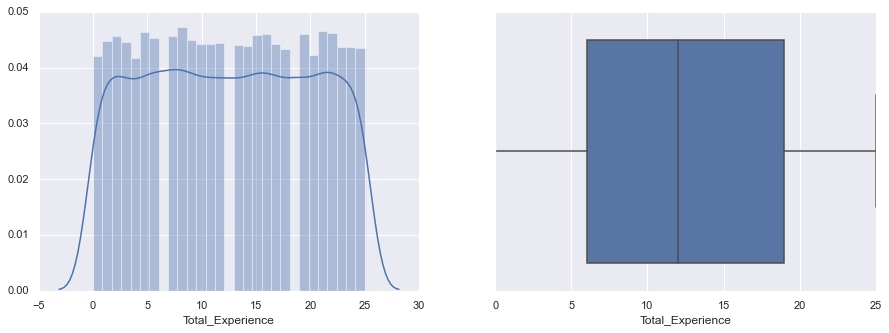

In [48]:
fig, axes=plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,5)
sns.distplot(df["Total_Experience"],kde=True,ax=axes[0])
sns.boxplot(x="Total_Experience",data=df,ax=axes[1])

In [49]:
df["Total_Experience"].describe().T

count    25000.000000
mean        12.493080
std          7.471398
min          0.000000
25%          6.000000
50%         12.000000
75%         19.000000
max         25.000000
Name: Total_Experience, dtype: float64

### Insights

* Total Experience ranges from a minimum of 0 years  to maximum of 25 years.

* The average Total Experience is around 12 years.

* The standard deviation of Total Experience is around 7.47.

* 25% , 50% (median) and 75 % of the Total_Experience:  are 6 , 12 and 19 years.

* Skewness indicating that the ditribution is slightly right skewed.

* Total Experience does not have any outliers.

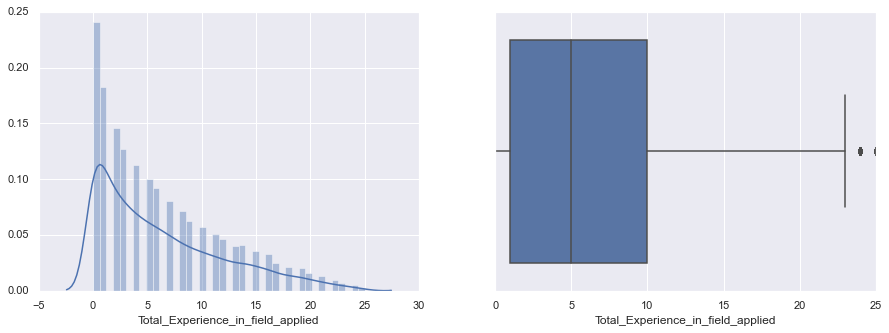

In [50]:
fig, axes=plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,5)
sns.distplot(df["Total_Experience_in_field_applied"],kde=True,ax=axes[0])
sns.boxplot(x="Total_Experience_in_field_applied",data=df,ax=axes[1])

In [51]:
df["Total_Experience_in_field_applied"].describe().T

count    25000.000000
mean         6.258200
std          5.819513
min          0.000000
25%          1.000000
50%          5.000000
75%         10.000000
max         25.000000
Name: Total_Experience_in_field_applied, dtype: float64

In [52]:
stats.skew(df.Total_Experience_in_field_applied)

0.9618931087134132

### Insights

* Total_Experience_in_field_appliedranges from a minimum of 0 years to maximum of 25 years.

* The average of Total_Experience_in_field_applied is around 5 years.

* The standard deviation of Total_Experience_in_field_applied is around 5.819.

* 25% , 50% (median) and 75 % of the Total_Experience_in_field_applied: are 1 , 5 and 10 years.

* Skewness indicating that the ditribution is right skewed.

* Total_Experience_in_field_applied does have outliers.

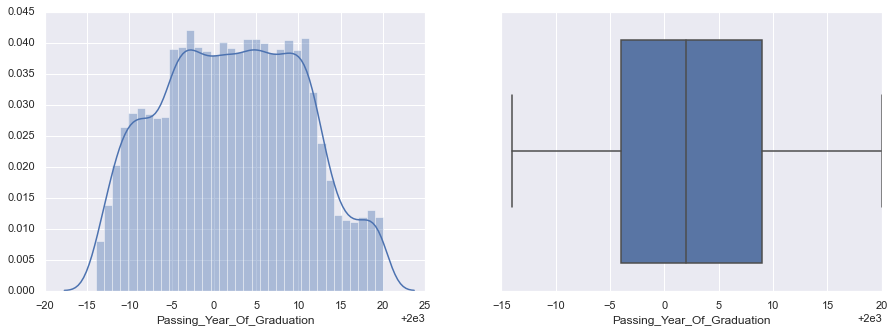

In [53]:
fig, axes=plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,5)
sns.distplot(df["Passing_Year_Of_Graduation"],kde=True,ax=axes[0])
sns.boxplot(x="Passing_Year_Of_Graduation",data=df,ax=axes[1])

In [54]:
df["Passing_Year_Of_Graduation"].describe().T

count    18820.000000
mean      2002.193624
std          8.316640
min       1986.000000
25%       1996.000000
50%       2002.000000
75%       2009.000000
max       2020.000000
Name: Passing_Year_Of_Graduation, dtype: float64

In [55]:
stats.skew(df.Passing_Year_Of_Graduation)

nan

### Insights

* Passing_Year_Of_Graduation ranges  from a  1986 year to 2020 year.

* The average year  of Passing_Year_Of_Graduation is around 2002.

* The standard deviation of Passing_Year_Of_Graduation is around 8.31

* 25% , 50% (median) and 75 % of the year are : are 1996 , 2002 and 2009 respectively.

* Skewness indicating that it is normally ditribution.

* Passing_Year_Of_Graduation does not have outliers.

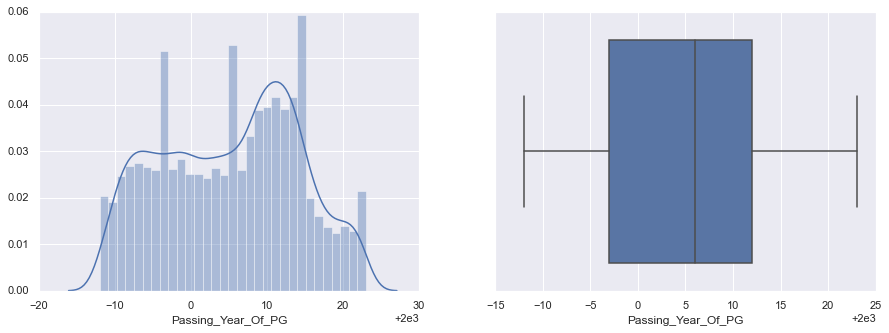

In [56]:
fig, axes=plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,5)
sns.distplot(df["Passing_Year_Of_PG"],kde=True,ax=axes[0])
sns.boxplot(x="Passing_Year_Of_PG",data=df,ax=axes[1])

In [57]:
df["Passing_Year_Of_PG"].describe().T

count    17308.000000
mean      2005.153571
std          9.022963
min       1988.000000
25%       1997.000000
50%       2006.000000
75%       2012.000000
max       2023.000000
Name: Passing_Year_Of_PG, dtype: float64

In [58]:
stats.skew(df.Passing_Year_Of_PG)

nan

### Insights
* Passing_Year_Of_PG ranges from a 1988 year to 2023 year.

* The average year of Passing_Year_Of_PG is around 2006.

* The standard deviation of Passing_Year_Of_PG is around 9.02

* 25% , 50% (median) and 75 % of the year are : are 1997 , 2006 and 2012 respectively.

* Skewness indicating that it is normally ditribution.

* Passing_Year_Of_PG does not have outliers.

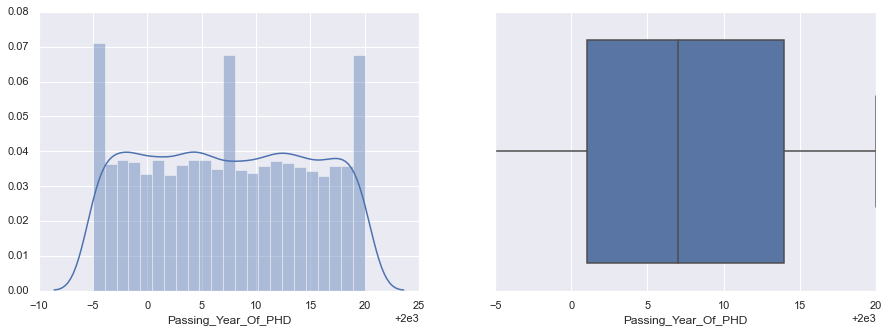

In [59]:
fig, axes=plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,5)
sns.distplot(df["Passing_Year_Of_PHD"],kde=True,ax=axes[0])
sns.boxplot(x="Passing_Year_Of_PHD",data=df,ax=axes[1])

In [60]:
df["Passing_Year_Of_PHD"].describe().T

count    13119.000000
mean      2007.396372
std          7.493601
min       1995.000000
25%       2001.000000
50%       2007.000000
75%       2014.000000
max       2020.000000
Name: Passing_Year_Of_PHD, dtype: float64

In [61]:
stats.skew(df.Passing_Year_Of_PHD)

nan

### Insights
* Passing_Year_Of_PHD ranges from a 1995 year to 2020 year.

* The average year of Passing_Year_Of_PHD is around 2007.

* The standard deviation of Passing_Year_Of_PHD is around 7.49

* 25% , 50% (median) and 75 % of the year are : are 2001 , 2007 and 2014 respectively.

* Skewness indicating that it is normally ditribution.

* Passing_Year_Of_PHD does not have outliers.

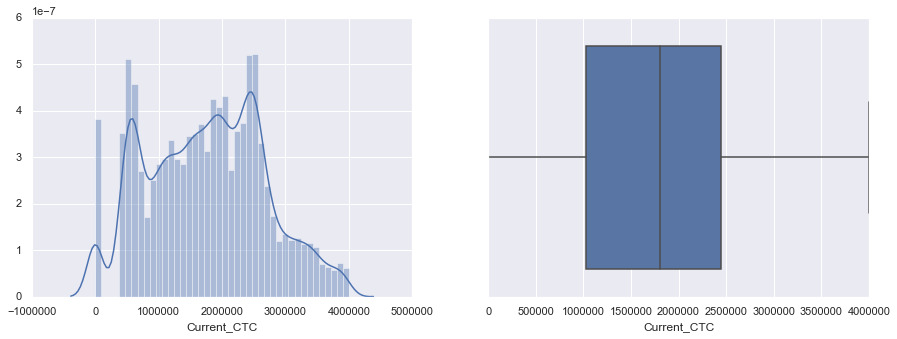

In [62]:
fig, axes=plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,5)
sns.distplot(df["Current_CTC"],kde=True,ax=axes[0])
sns.boxplot(x="Current_CTC",data=df,ax=axes[1])

In [63]:
df["Current_CTC"].describe().T

count    2.500000e+04
mean     1.760945e+06
std      9.202125e+05
min      0.000000e+00
25%      1.027312e+06
50%      1.802568e+06
75%      2.443883e+06
max      3.999693e+06
Name: Current_CTC, dtype: float64

In [64]:
stats.skew(df.Current_CTC)

0.09763709404911634

### Insights
* Current_CTC ranges from 0.000000e+00 to 3.999693e+06

* The average Current CTC is around 1.802568e+06.

* The standard deviation of Current_CTC is around 9.202125e+05

* 25% , 50% (median) and 75 % of the Current_CTC are : 1.027312e+06 , 1.802568e+06 and 2.443883e+06 respectively.

* Skewness indicating that it is slightly right distribution.

* Current_CTC does not have outliers.

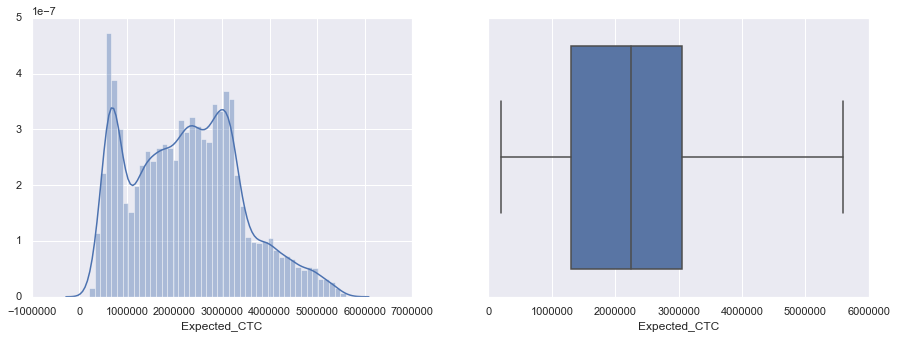

In [65]:
fig, axes=plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,5)
sns.distplot(df["Expected_CTC"],kde=True,ax=axes[0])
sns.boxplot(x="Expected_CTC",data=df,ax=axes[1])

In [66]:
df["Expected_CTC"].describe().T

count    2.500000e+04
mean     2.250155e+06
std      1.160480e+06
min      2.037440e+05
25%      1.306278e+06
50%      2.252136e+06
75%      3.051354e+06
max      5.599570e+06
Name: Expected_CTC, dtype: float64

In [67]:
stats.skew(df.Expected_CTC)

0.3319518813411574

### Insights
* Expected_CTC ranges from 2.037440e+05 to 5.599570e+06

* The average Expected_CTC is around 2.252136e+06.

* The standard deviation of Expected_CTC is around 1.160480e+06

* 25% , 50% (median) and 75 % of the Expected_CTC are : 1.306278e+06 , 3.051354e+06 and 5.599570e+06 respectively.

* Skewness indicating that it is positive right distribution.

* Expected_CTC does not have outliers.

##### Univariate Analysis on  Discrete Continuous  variable

In [68]:
df["No_Of_Companies_worked"].describe().T

count    25000.000000
mean         3.482040
std          1.690335
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: No_Of_Companies_worked, dtype: float64

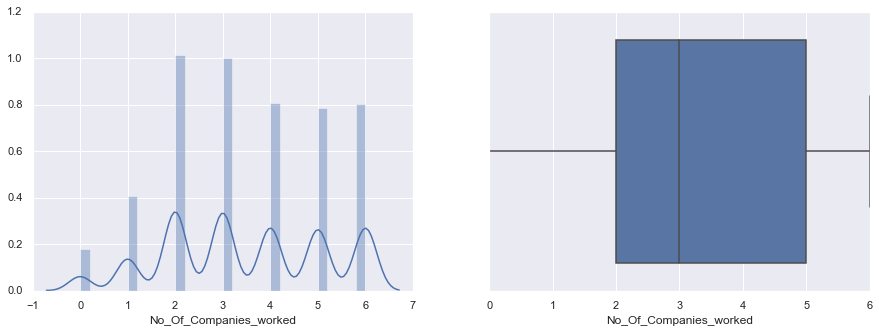

In [69]:
fig, axes=plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,5)
sns.distplot(df["No_Of_Companies_worked"],kde=True,ax=axes[0])
sns.boxplot(x="No_Of_Companies_worked",data=df,ax=axes[1])

### Insights -

* No. of companies worked till date ranges from a minimum of 0 to maximum of 6.

* Mean No. of companies worked till date is near by 3.48.

* 25% , 50% (median) and 75 % of No. of companies worked till date are 2 , 3 and 5.

In [70]:
df["Number_of_Publications"].describe().T

count    25000.000000
mean         4.089040
std          2.606612
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          8.000000
Name: Number_of_Publications, dtype: float64

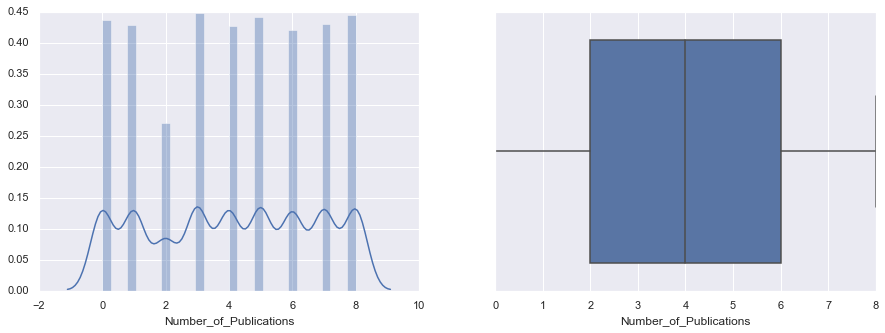

In [71]:
fig, axes=plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,5)
sns.distplot(df["Number_of_Publications"],kde=True,ax=axes[0])
sns.boxplot(x="Number_of_Publications",data=df,ax=axes[1])

### Insights -

* Number_of_Publications range is  from a min of 0 to max of 8.

* Average Number_of_Publications is near by 4.

* 25% , 50%  and 75 % of Number_of_Publications are 2 , 4 and 6.

* Number_of_Publications does not have any outliers.

In [72]:
df["Certifications"].describe().T

count    25000.000000
mean         0.773680
std          1.199449
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: Certifications, dtype: float64

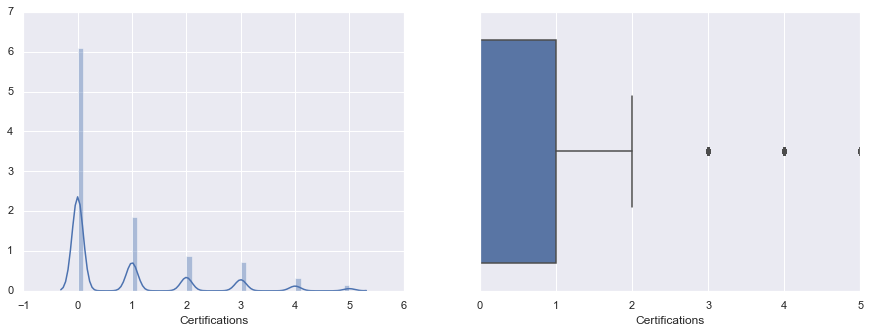

In [73]:
fig, axes=plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,5)
sns.distplot(df["Certifications"],kde=True,ax=axes[0])
sns.boxplot(x="Certifications",data=df,ax=axes[1])

#### Insights -

* Number of relevant certifications completed ranges from a minimum of 0 to maximum of 5.

* Average Number of relevant certifications completed is around 1.

* 25% , 50% and 75 % of Number of relevant certifications completed are 0 , 0 and 1.

* Distribution is right-skewed.

* certifications have some  outliers.

### Univariate Analysis on categorical variable

* A countplot is kind of like a histogram or a bar graph for categorical variables.

In [74]:
df["Department"].value_counts(normalize=True)

Marketing         0.107056
Analytics/BI      0.094321
Healthcare        0.092791
Others            0.091846
Sales             0.089596
HR                0.089461
Banking           0.087841
Education         0.087661
Engineering       0.087166
Top Management    0.073441
Accounts          0.050311
IT-Software       0.048510
Name: Department, dtype: float64

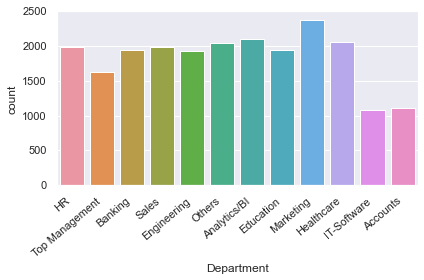

In [75]:
ax = sns.countplot(x="Department", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### Insights

* Marketing label has the most no of frequency in Department Column where as IT-Software has least no of Frequency.

In [76]:
df["Role"].value_counts(normalize=True)

Others                  0.093522
Bio statistician        0.079586
Analyst                 0.078712
Project Manager         0.076965
Team Lead               0.076257
Consultant              0.074053
Business Analyst        0.071182
Sales Execituve         0.065482
Sales Manager           0.059367
Senior Researcher       0.051421
Financial Analyst       0.049174
CEO                     0.047801
Scientist               0.047385
Head                    0.046096
Associate               0.031909
Data scientist          0.015102
Principal Analyst       0.011441
Area Sales Manager      0.005575
Senior Analyst          0.005325
Researcher              0.005117
Sr. Business Analyst    0.004743
Professor               0.001373
Research Scientist      0.001373
Lab Executuve           0.001040
Name: Role, dtype: float64

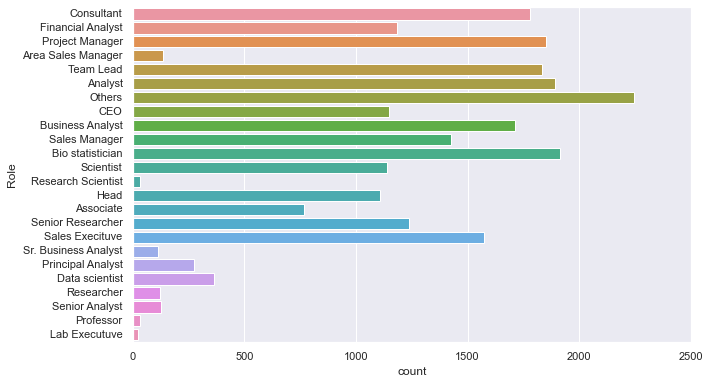

In [77]:
plt.figure(figsize=(10,6))
sns.countplot(y="Role",data=df)

### Insights

* Others label has highest no of count where as Lab Executive has least no of count in terms of frequency.

In [78]:
df["Industry"].value_counts(normalize=True)

Training      0.092852
IT            0.092479
Insurance     0.092105
BFSI          0.091607
Automobile    0.091400
Analytics     0.091358
Retail        0.091109
Telecom       0.090902
Aviation      0.090611
FMCG          0.090486
Others        0.085090
Name: Industry, dtype: float64

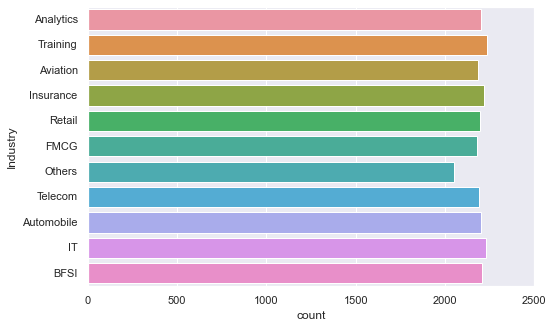

In [79]:
plt.figure(figsize=(8,5))
sns.countplot(y="Industry",data=df)

### Insights

* Most of the Labels have the similar kind of frequency .
* Training is on topmost in frequency where as Others has least count.

In [80]:
df["Organization"].value_counts(normalize=True)

M    0.065333
J    0.064544
P    0.064005
H    0.063590
A    0.063341
F    0.062469
G    0.062427
K    0.062386
I    0.061805
E    0.061763
B    0.061763
L    0.061597
C    0.061514
N    0.061265
D    0.061182
O    0.061016
Name: Organization, dtype: float64

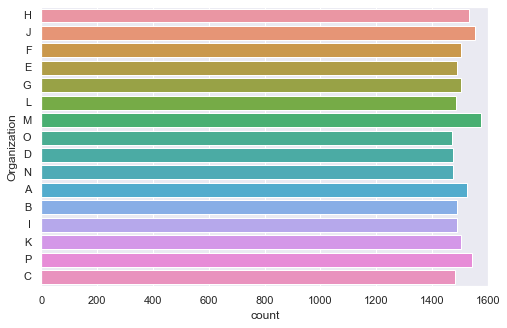

In [81]:
plt.figure(figsize=(8,5))
sns.countplot(y="Organization",data=df)

### Insights
* Most of the Labels have the similar kind of frequency .

* M label is on topmost in frequency where as C label has least count.

In [82]:
df["Designation"].value_counts(normalize=True)

HR                    0.075351
Others                0.075305
Manager               0.074436
Product Manager       0.074345
Sr.Manager            0.073934
Consultant            0.073431
Marketing Manager     0.072699
Assistant Manager     0.072699
Data Analyst          0.072013
Research Analyst      0.071464
Medical Officer       0.047872
Software Developer    0.041790
Web Designer          0.040327
Network Engineer      0.039413
Director              0.035298
CA                    0.032692
Research Scientist    0.024553
Scientist             0.002378
Name: Designation, dtype: float64

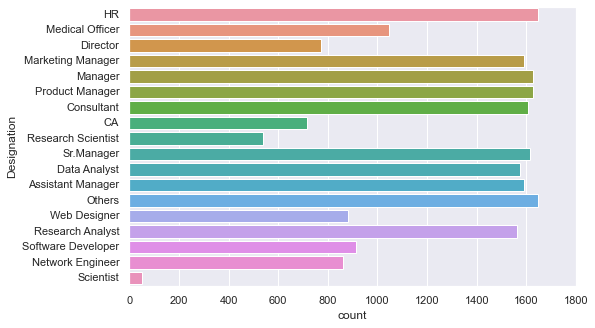

In [83]:
plt.figure(figsize=(8,5))
sns.countplot(y="Designation",data=df)

### Insights
* Most of the Labels have the similar kind of frequency .

* HR and Others label is on topmost in frequency where as Scientist label has least count.

In [84]:
df["Education"].value_counts(normalize=True)

PG            0.25304
Doctorate     0.25140
Grad          0.24836
Under Grad    0.24720
Name: Education, dtype: float64

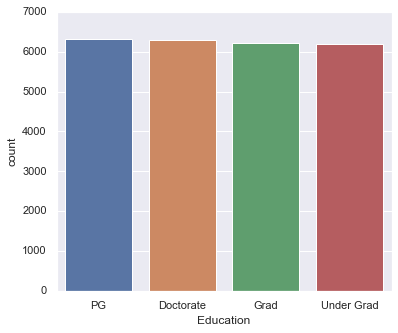

In [85]:
plt.figure(figsize=(6,5))
sns.countplot(x="Education",data=df)

### Insights

* All 4 labels have near by equivalent no of frequency count.

In [86]:
df["Graduation_Specialization"].value_counts(normalize=True)

Chemistry      0.094846
Economics      0.094261
Mathematics    0.094049
Zoology        0.091923
Arts           0.091445
Psychology     0.090595
Sociology      0.090170
Botony         0.088948
Engineering    0.088257
Others         0.088204
Statistics     0.087301
Name: Graduation_Specialization, dtype: float64

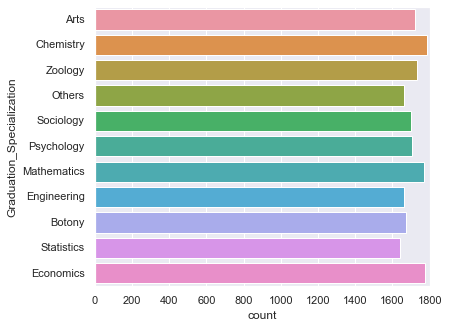

In [87]:
plt.figure(figsize=(6,5))
sns.countplot(y="Graduation_Specialization",data=df)

### Insights

* Graduation_Specialization labels have simlar kind of distribution.Most labels have near 1600 frequency count.

In [88]:
df["University_Grad"].value_counts(normalize=True)

Bhubaneswar    0.080234
Delhi          0.079277
Mangalore      0.079171
Mumbai         0.079065
Jaipur         0.078533
Lucknow        0.077418
Guwahati       0.076993
Pune           0.075877
Kolkata        0.075770
Surat          0.075664
Nagpur         0.075452
Bangalore      0.074070
Ahmedabad      0.072476
Name: University_Grad, dtype: float64

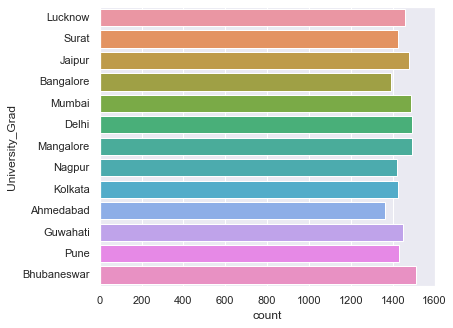

In [89]:
plt.figure(figsize=(6,5))
sns.countplot(y="University_Grad",data=df)

### Insights

* University_Grad labels have simlar kind of distribution range.

* Most labels have near 1400 frequency count.

In [90]:
df["PG_Specialization"].value_counts(normalize=True)

Mathematics    0.103998
Chemistry      0.103767
Economics      0.101398
Engineering    0.096718
Statistics     0.094696
Others         0.094118
Psychology     0.082332
Zoology        0.082274
Arts           0.081465
Sociology      0.080021
Botony         0.079212
Name: PG_Specialization, dtype: float64

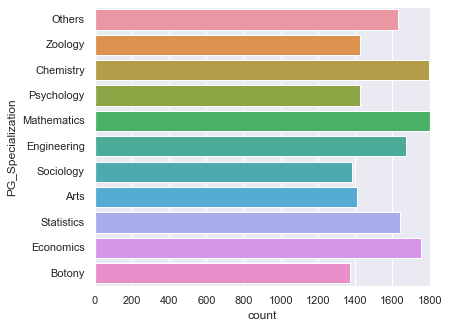

In [91]:
plt.figure(figsize=(6,5))
sns.countplot(y="PG_Specialization",data=df)

### Insights
* * In PG_Specialization labels Chemistry and Mathematics has maximum frequeny where as Zoology, Psychology,Sociology,Arts,Botony have similar kind of frequency.

In [92]:
df["University_PG"].value_counts(normalize=True)

Bhubaneswar    0.079559
Delhi          0.079039
Mangalore      0.078981
Mumbai         0.078923
Jaipur         0.078519
Guwahati       0.077421
Surat          0.076785
Lucknow        0.076728
Pune           0.075919
Nagpur         0.075861
Kolkata        0.075456
Bangalore      0.074359
Ahmedabad      0.072452
Name: University_PG, dtype: float64

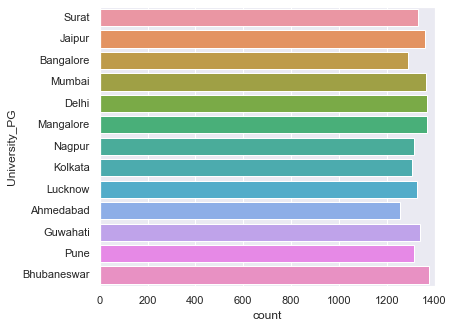

In [93]:
plt.figure(figsize=(6,5))
sns.countplot(y="University_PG",data=df)

### Insights

* University_PG labels have simlar kind of distribution.
* Most labels have near 1300 frequency count.

In [94]:
df["PHD_Specialization"].value_counts(normalize=True)

Others         0.117768
Chemistry      0.111137
Mathematics    0.105038
Economics      0.102371
Engineering    0.095968
Statistics     0.094214
Zoology        0.077064
Sociology      0.075387
Psychology     0.075158
Botony         0.074396
Arts           0.071499
Name: PHD_Specialization, dtype: float64

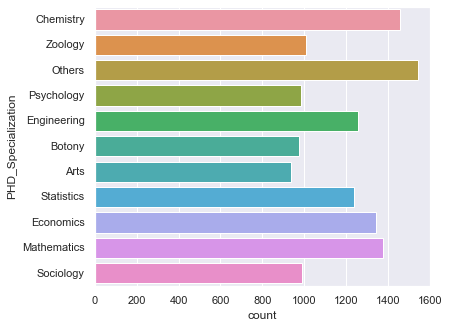

In [95]:
plt.figure(figsize=(6,5))
sns.countplot(y="PHD_Specialization",data=df)

### Insights

* In PHD_Specialization label Arts label has least number of frequecy count where as Others has highest no of frequency count.

In [96]:
df["University_PHD"].value_counts(normalize=True)

Kolkata        0.081485
Delhi          0.081104
Mumbai         0.079732
Guwahati       0.078512
Pune           0.077064
Surat          0.076911
Jaipur         0.076073
Lucknow        0.075844
Bangalore      0.075768
Bhubaneswar    0.075616
Mangalore      0.075311
Nagpur         0.073481
Ahmedabad      0.073100
Name: University_PHD, dtype: float64

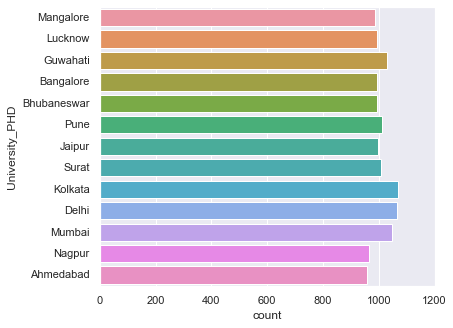

In [97]:
plt.figure(figsize=(6,5))
sns.countplot(y="University_PHD",data=df)

### Insights

* University_PHD labels have simlar kind of distribution range in terms of count.

* Most labels have near 900 frequency count.

In [98]:
df["Current_Location"].value_counts(normalize=True)

Bangalore      0.06968
Jaipur         0.06824
Bhubaneswar    0.06816
Mangalore      0.06788
Delhi          0.06720
Ahmedabad      0.06708
Guwahati       0.06688
Chennai        0.06676
Kanpur         0.06656
Nagpur         0.06652
Mumbai         0.06632
Lucknow        0.06548
Pune           0.06488
Kolkata        0.06480
Surat          0.06356
Name: Current_Location, dtype: float64

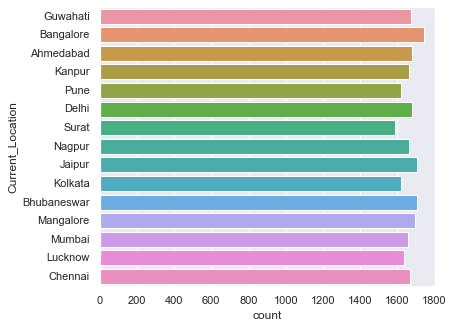

In [99]:
plt.figure(figsize=(6,5))
sns.countplot(y="Current_Location",data=df)

### Insights

* Current_location labels have simlar kind of distribution.Most labels have near with in range more than 1500 to 1600 frequency count.

In [100]:
df["Preferred_location"].value_counts(normalize=True)

Kanpur         0.06880
Ahmedabad      0.06860
Guwahati       0.06780
Mangalore      0.06776
Surat          0.06772
Delhi          0.06732
Chennai        0.06720
Kolkata        0.06676
Jaipur         0.06636
Pune           0.06616
Bhubaneswar    0.06612
Nagpur         0.06600
Mumbai         0.06468
Lucknow        0.06448
Bangalore      0.06424
Name: Preferred_location, dtype: float64

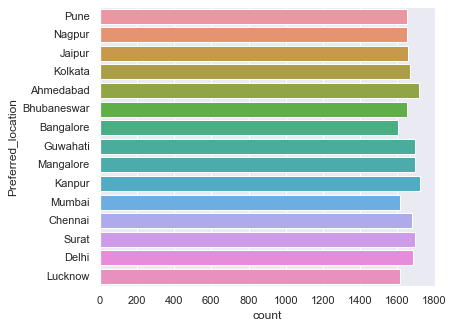

In [101]:
plt.figure(figsize=(6,5))
sns.countplot(y="Preferred_location",data=df)

### Insights

* Preferred_location labels have simlar kind of distribution.Most labels have near 1600 frequency count.

In [102]:
df["Inhand_Offer"].value_counts(normalize=True)

N    0.69672
Y    0.30328
Name: Inhand_Offer, dtype: float64

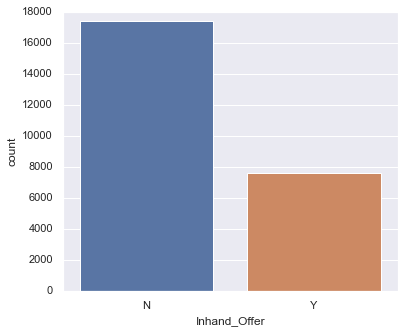

In [103]:
plt.figure(figsize=(6,5))
sns.countplot(x="Inhand_Offer",data=df)

### Insights

* N label has highest frequency count greater than 17000 where as Y label has more than 7000 frequency count.

In [104]:
df["Last_Appraisal_Rating"].value_counts(normalize=True)

B                0.228333
D                0.204093
C                0.199734
A                0.193882
Key_Performer    0.173958
Name: Last_Appraisal_Rating, dtype: float64

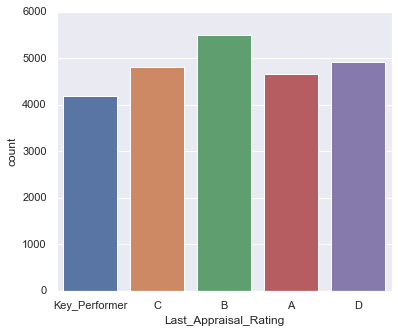

In [105]:
plt.figure(figsize=(6,5))
sns.countplot(x="Last_Appraisal_Rating",data=df)

### Insights
* B labels has maximum frequency count where as Key_Performer has least number of count.
* C and D labels have  quite similar kind of frequency count.

### Bivariant Analysis

#### Scatter Plot

* A Scatter (XY) Plot has points that show the relationship between two sets of data. In this example, each dot shows one person's weight versus their height. (The data is plotted on the graph as "Cartesian (x,y) Coordinates")

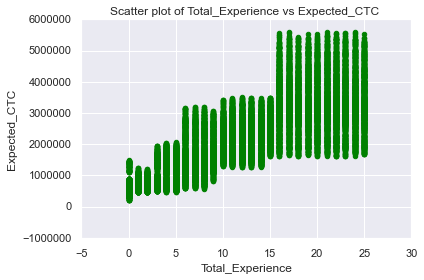

In [106]:
plt.scatter(df['Total_Experience'],df['Expected_CTC'],color="green")
plt.title("Scatter plot of Total_Experience vs Expected_CTC ")
plt.xlabel("Total_Experience")
plt.ylabel("Expected_CTC")
plt.tight_layout()
plt.show()

#### Insights:
* Total_Experience having strong positive relationship with respect to Expected_CTC as the Total_Experience increases the Expected_CTC will also increases.


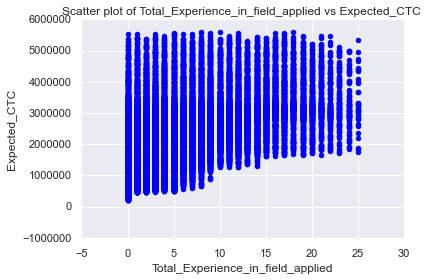

In [107]:
plt.scatter(df['Total_Experience_in_field_applied'],df['Expected_CTC'],color="blue")
plt.title("Scatter plot of Total_Experience_in_field_applied vs Expected_CTC ")
plt.xlabel("Total_Experience_in_field_applied")
plt.ylabel("Expected_CTC")
plt.tight_layout()
plt.show()

### Insights:
* Total_Experience_in_field_applied having quite cloudy relationship with respect to Expected_CTC.

* we can infer only that as the Total_Experience_in_field_applied is increases the Expected_CTC will also get slightly increases. 

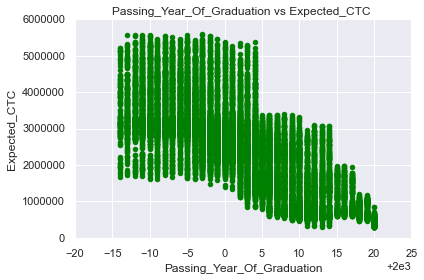

In [108]:
plt.scatter(df['Passing_Year_Of_Graduation'],df['Expected_CTC'],color="green")
plt.title("Passing_Year_Of_Graduation vs Expected_CTC ")
plt.xlabel("Passing_Year_Of_Graduation")
plt.ylabel("Expected_CTC")
plt.tight_layout()
plt.show()

### Insights

* Passing_Year_Of_Graduation have negative relation with Expected_CTC as the oldest year having higher Expected_CTC where as the latest year has lowest Expected_CTC.

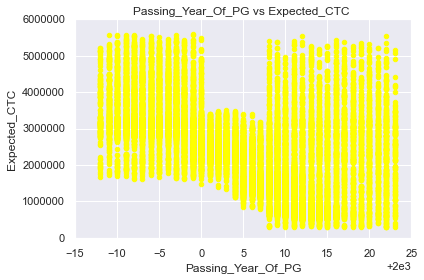

In [109]:
plt.scatter(df['Passing_Year_Of_PG'],df['Expected_CTC'],color="yellow")
plt.title("Passing_Year_Of_PG vs Expected_CTC ")
plt.xlabel("Passing_Year_Of_PG")
plt.ylabel("Expected_CTC")
plt.tight_layout()
plt.show()

### Insights

* Passing_Year_Of_PG has no clearly no such clear relationship with respect to Expected_CTC.

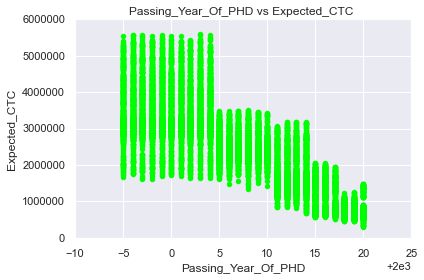

In [110]:
plt.scatter(df['Passing_Year_Of_PHD'],df['Expected_CTC'],color="lime")
plt.title("Passing_Year_Of_PHD vs Expected_CTC ")
plt.xlabel("Passing_Year_Of_PHD")
plt.ylabel("Expected_CTC")
plt.tight_layout()
plt.show()

### Insights
* Passing_Year_Of_PHD having negative corelation with the respect of Expected_CTC as the latest years having more Expected_CTC compared to past no of years.

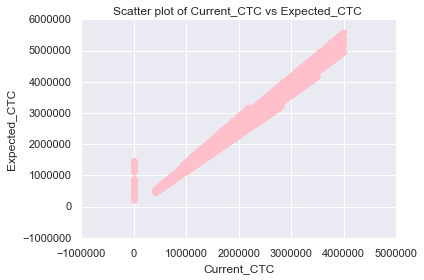

In [111]:
plt.scatter(df['Current_CTC'],df['Expected_CTC'],color="pink")
plt.title("Scatter plot of Current_CTC vs Expected_CTC ")
plt.xlabel("Current_CTC")
plt.ylabel("Expected_CTC")
plt.tight_layout()
plt.show()

### Insights
*  Current_CTC having positive corelation with the respect of Expected_CTC as the Current_CTC is increasing the Expected_CTC is also increasing.

### Now we have to show the relationship of one categorical feature to the dependent variable and fetch insights from the graph using boxplot

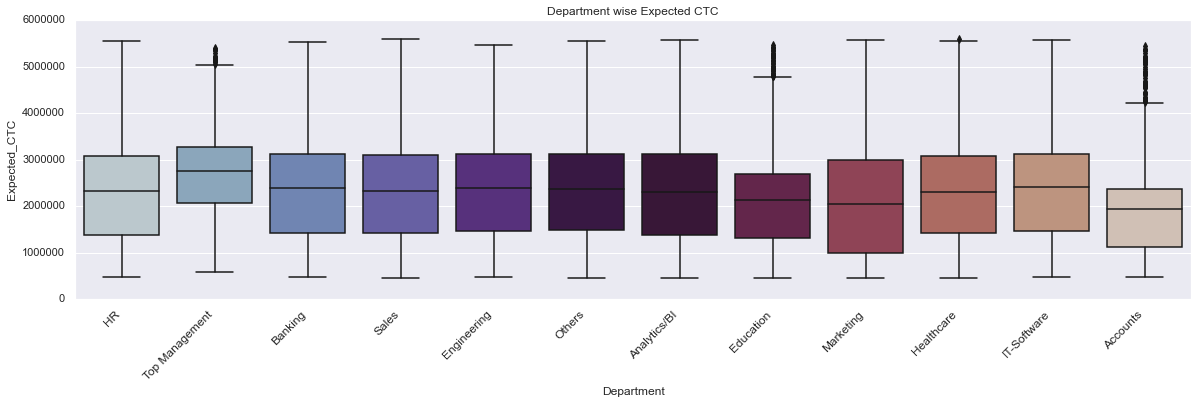

In [112]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Department", y="Expected_CTC", data=df, palette="twilight")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.title('Department wise Expected CTC')
chart;

### Insights
* Top Management has the highest median value more than 2500000 rupees it means the higher number of Expected_CTC is associated with Top Management in terms of money.

* Accounts has least median value in terms of Expected_CTC

* Top Management , Education , Healthcare and Accounts have outliers.


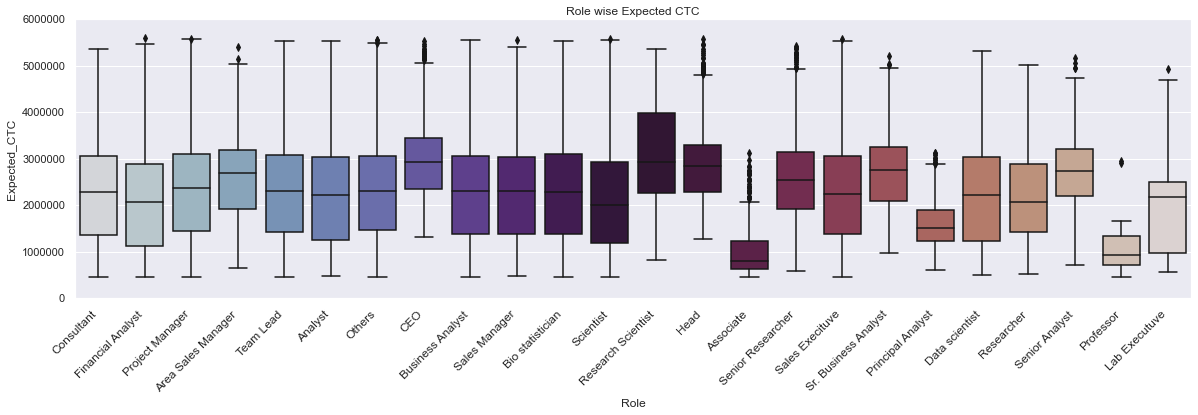

In [113]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Role", y="Expected_CTC", data=df, palette="twilight")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.title('Role wise Expected CTC')
chart;

### Insights
* CEO and Head have highest median value that means salary range are high with respect to Expected_CTC.

* Associate has least median value means Expected_CTC has low salary with respect to Associate.

* Most of the label type of Role Feature has Outliers in terms of Expected_CTC.


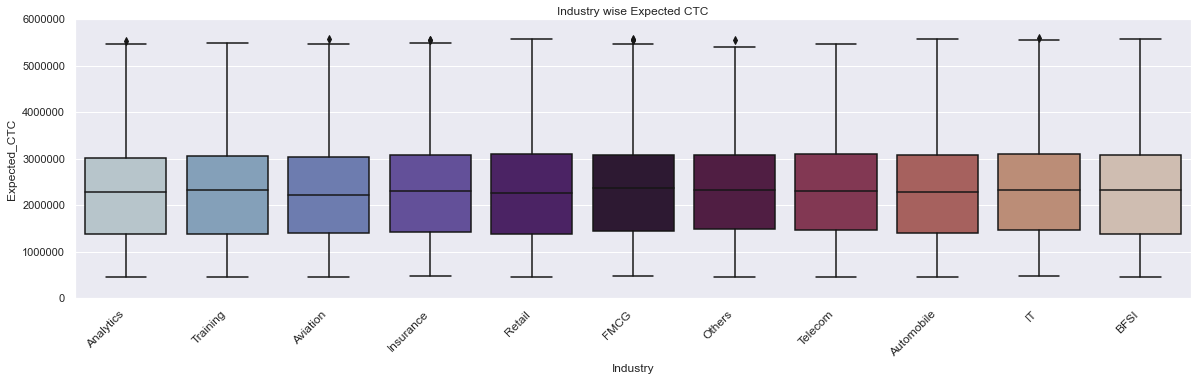

In [114]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Industry", y="Expected_CTC", data=df, palette="twilight")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.title('Industry wise Expected CTC')
chart;

### Insights
* FMCG has highest median value that means salary range median value are high with respect to FMCG label.

* Training, Retail, Telecom, AutoMobile, BFSI have no outliers expect other labels have outliers with respect to Expected_CTC.

* The range of all the Industry Label have same kind of inter-quartile range.

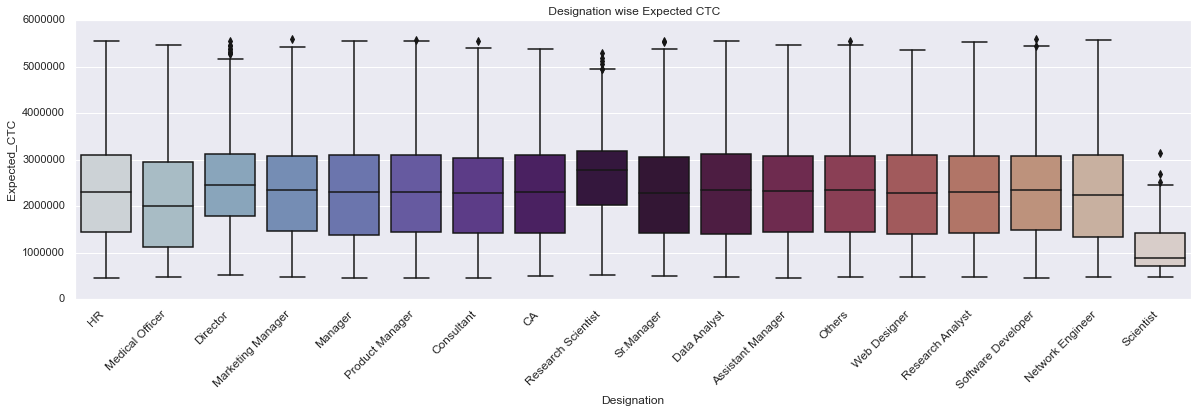

In [115]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Designation", y="Expected_CTC", data=df, palette="twilight")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.title(' Designation wise Expected CTC')
chart;

### Insights
* Research Scientist has highest median value that means Expected_CTC range median value are high with respect to Research Scientist  label.

* HR ,Medical Officer , Manager , CA , Data Analyst , Assistant Manager ,Web Designer, Research Analyst ,Network Engineer have no outliers expect other labels have outliers with respect to Expected_CTC.

* The Scientist has lowest median value across all labels.

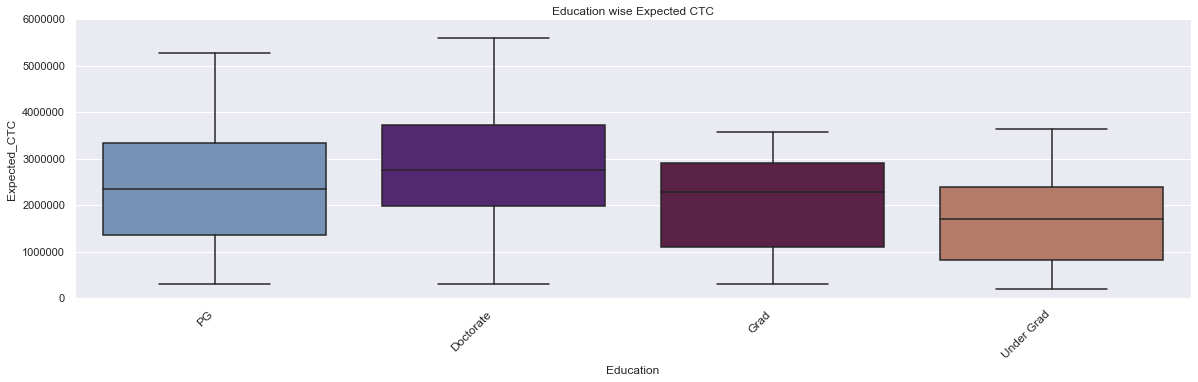

In [116]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Education", y="Expected_CTC", data=df, palette="twilight")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.title('Education wise Expected CTC')
chart;

### Insights
* Doctorate has highest median value that means Expected_CTC range median value are high with respect to Doctorate label.

* PG, Doctorate , Grad , Under Grad have no outliers expect other labels have outliers with respect to Expected_CTC.

* The Under Grad has lowest median value across all labels.

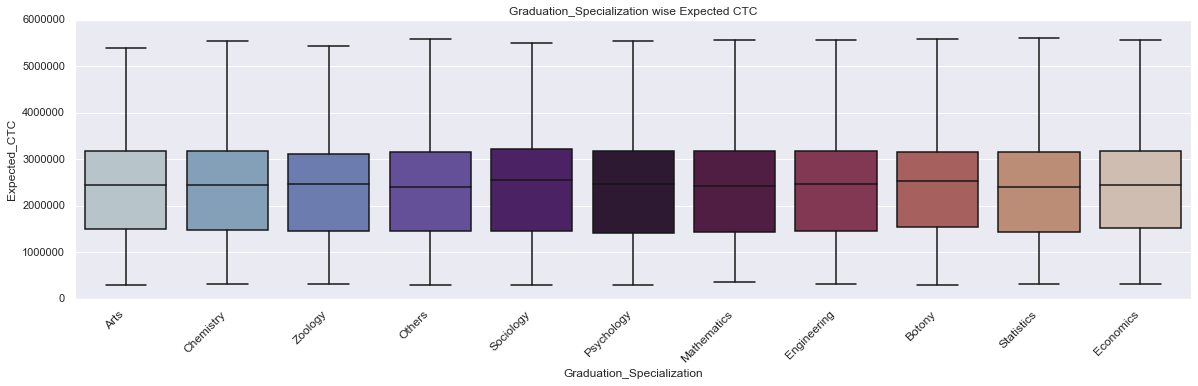

In [117]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Graduation_Specialization", y="Expected_CTC", data=df, palette="twilight")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.title('Graduation_Specialization wise Expected CTC')
chart;

### Insights

* Median value and IQR range of all the labels are quite similar with respect to Expected_CTC.

* There is no outlier present in the labels of Graduation_Specialization with respect to Expected_CTC.


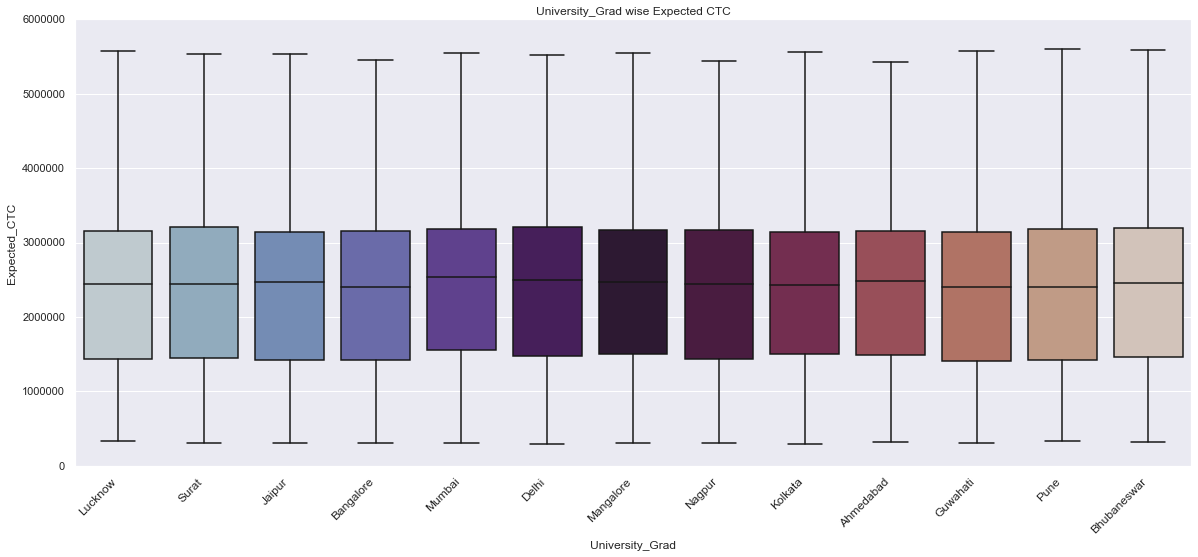

In [118]:
plt.figure(figsize=(20,8))

chart=sns.boxplot(x="University_Grad", y="Expected_CTC", data=df, palette="twilight")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.title('University_Grad wise Expected CTC')
chart;

### Insights

* Median value and IQR range of all the labels are quite similar with respect to Expected_CTC.

* There is no outlier present in the labels of University_Grad  with respect to Expected_CTC.

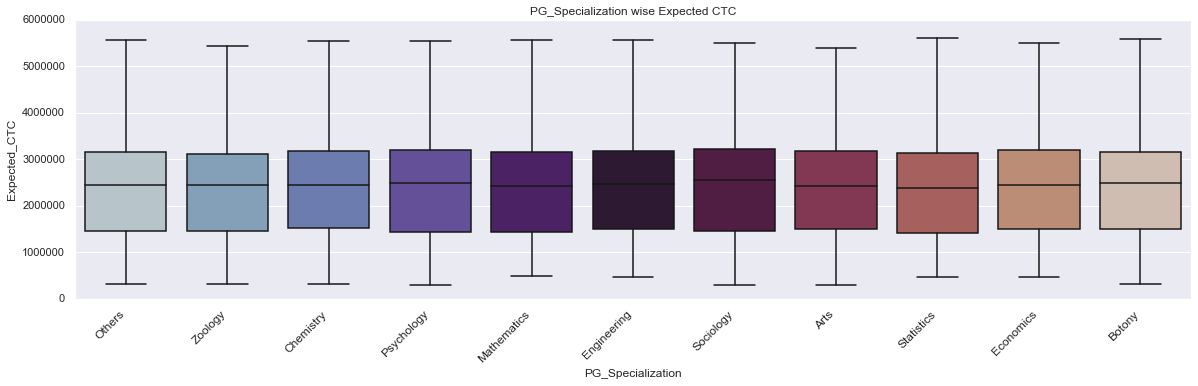

In [119]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="PG_Specialization", y="Expected_CTC", data=df, palette="twilight")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.title('PG_Specialization wise Expected CTC')
chart;

### Insights
* Median value and IQR range of all the labels are quite similar with respect to Expected_CTC.

* There is no outlier present in the labels of PG_Specialization with respect to Expected_CTC.

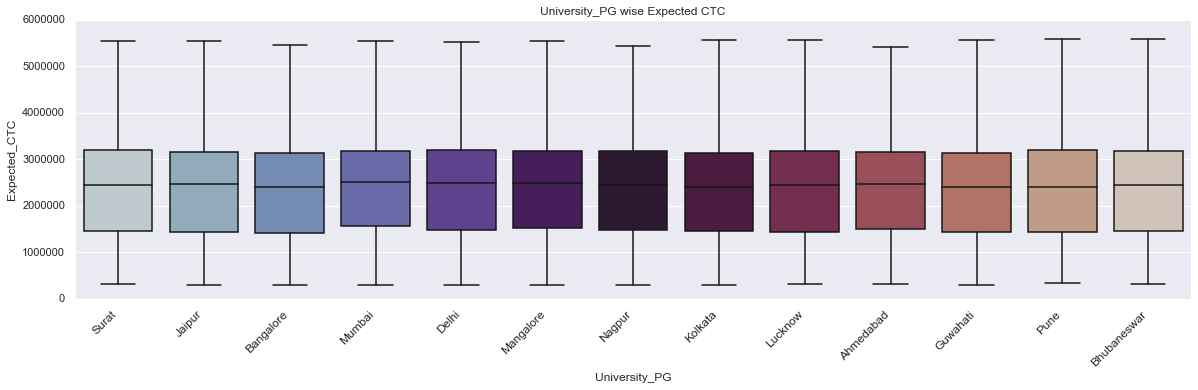

In [120]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="University_PG", y="Expected_CTC", data=df, palette="twilight")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.title('University_PG wise Expected CTC')
chart;

### Insights
* Median value and IQR range of all the labels are quite similar with respect to Expected_CTC.

* There is no outlier present in the labels of University_PG with respect to Expected_CTC.

* There is no variations among all the labels i.e similar kind of distribution across Expected_CTC.

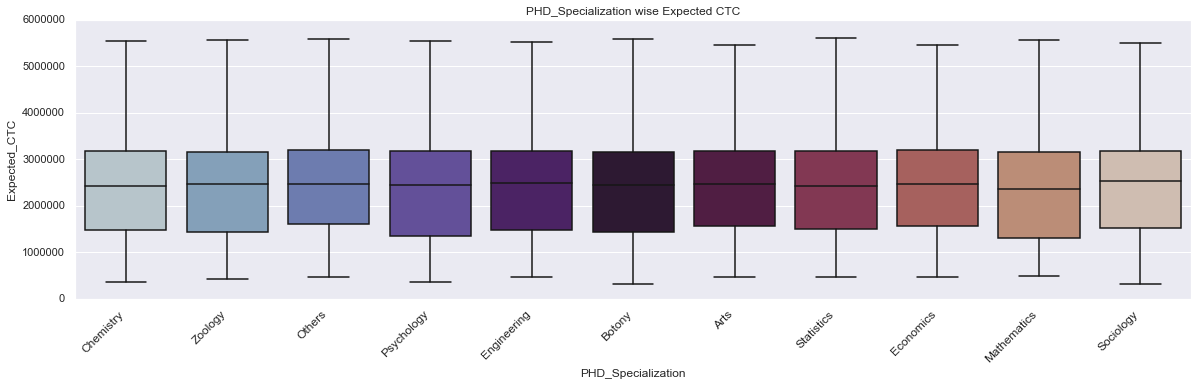

In [121]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="PHD_Specialization", y="Expected_CTC", data=df, palette="twilight")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.title('PHD_Specialization wise Expected CTC')
chart;

### Insights
* Median value and IQR range of all the labels are quite similar with respect to Expected_CTC.

* There is no outlier present in the labels of PHD_Specialization with respect to Expected_CTC.

* There is no variations among all the labels i.e similar kind of distribution across Expected_CTC.

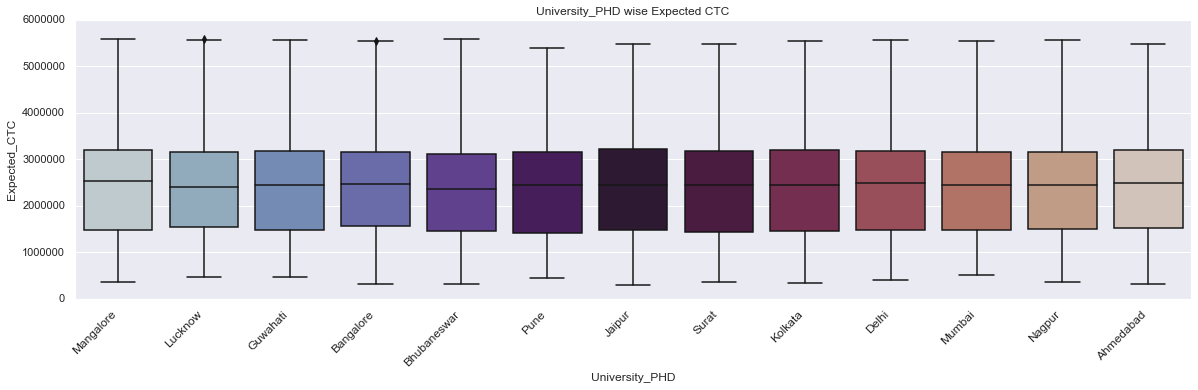

In [122]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="University_PHD", y="Expected_CTC", data=df, palette="twilight")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.title('University_PHD wise Expected CTC')
chart;

### Insights
* Median value and IQR range of all the labels are quite similar with respect to Expected_CTC.

* There is no outlier present in the labels of University_PHD with respect to Expected_CTC.

* There is no variations among all the labels i.e similar kind of distribution across Expected_CTC.

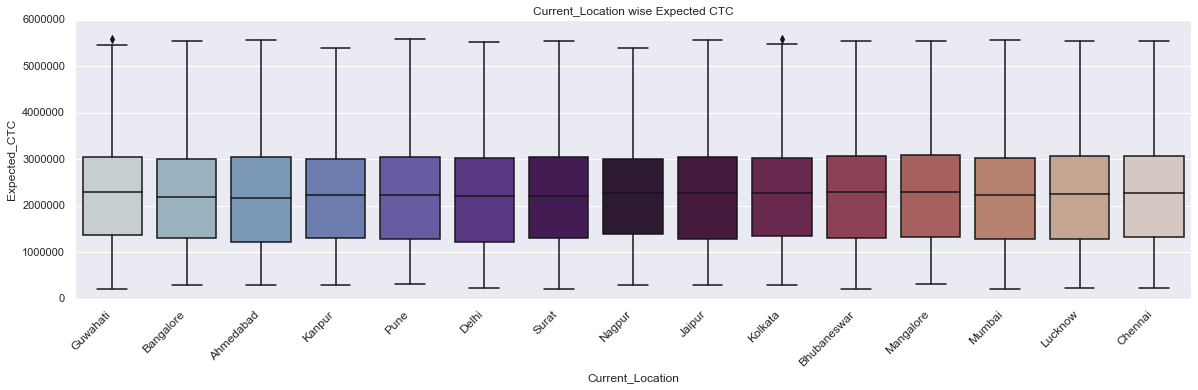

In [123]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Current_Location", y="Expected_CTC", data=df, palette="twilight")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.title('Current_Location wise Expected CTC')
chart;

### Insights
* Median value and IQR range of all the labels are quite similar with respect to Expected_CTC.

* There is no outlier present in the labels of Curent_Location with respect to Expected_CTC.

* There is no variations among all the labels i.e similar kind of distribution across Expected_CTC.

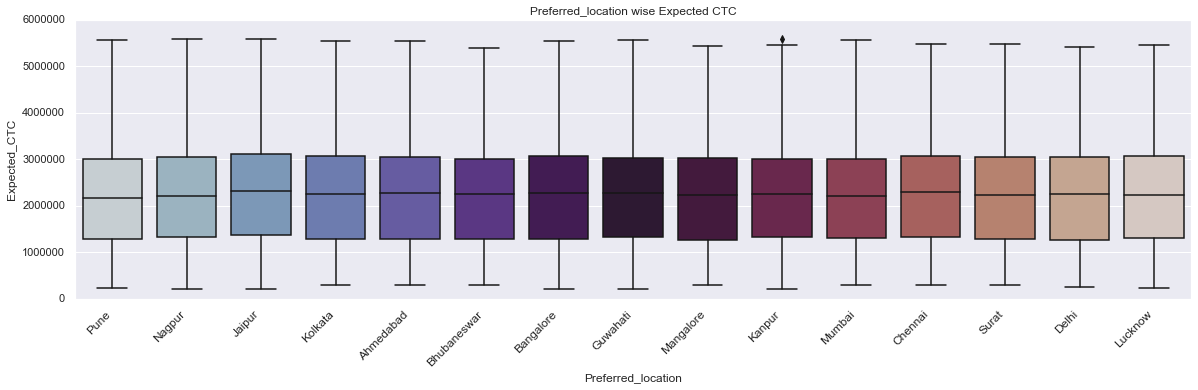

In [124]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Preferred_location", y="Expected_CTC", data=df, palette="twilight")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.title('Preferred_location wise Expected CTC')
chart;

### Insights
* Median value and IQR range of all the labels are quite similar with respect to Expected_CTC.

* There is no outlier present in the labels of Preferred_location with  respect to Expected_CTC.

* There is no variations among all the labels i.e similar kind of distribution across Expected_CTC.

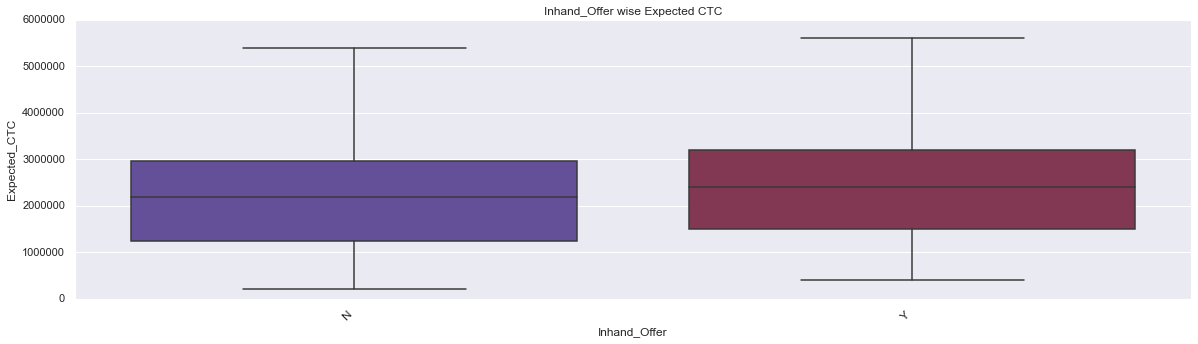

In [125]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Inhand_Offer", y="Expected_CTC", data=df, palette="twilight")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.title('Inhand_Offer wise Expected CTC')
chart;

### Insights
* IQR range of Inhand_Offer are quite similar with respect to Expected_CTC.

* There is no outlier present in the labels of Inhand_Offer  with respect to Expected_CTC.

* The median value of Y label of Inhand_Offer is greater than N label.


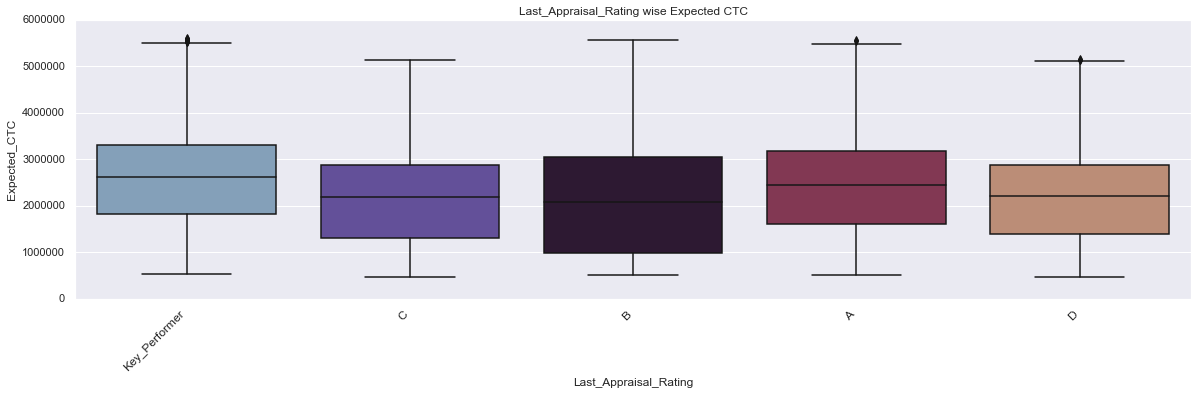

In [126]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Last_Appraisal_Rating", y="Expected_CTC", data=df, palette="twilight")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.title('Last_Appraisal_Rating wise Expected CTC')
chart;

### Insights

* There is no outlier present  C and B labels with respect to Expected_CTC ,rest all labels have outliers.

* The median value of Key_Performer label is highest among all labels.

## Multivariate Analysis
### <span class="girk">Heatmap</span>

* A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors.

* It represents the collinearity of the multiple variables in the dataset. data.corr() was used in the code to show the correlation between the values. This is where we want to set our independent or target variable.

In [127]:
cor=df.corr()

In [128]:
cor

,Total_Experience,Total_Experience_in_field_applied,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC,Percentage_in_Relevant_Field
Total_Experience,1.000000,0.645135,-0.902931,-0.634718,-1.000000,0.846476,0.398135,-0.000494,-0.001130,0.084072,0.816593,0.006853
Total_Experience_in_field_applied,0.645135,1.000000,-0.581495,-0.410642,-0.648457,0.548017,0.249045,-0.010663,-0.002814,0.043070,0.529115,0.656567
Passing_Year_Of_Graduation,-0.902931,-0.581495,1.000000,0.841074,0.989101,-0.778366,-0.362545,-0.336380,-0.030236,-0.085648,-0.758694,-0.003310
Passing_Year_Of_PG,-0.634718,-0.410642,0.841074,1.000000,0.989101,-0.544691,-0.255205,-0.491231,-0.026095,-0.066140,-0.530964,-0.000663
Passing_Year_Of_PHD,-1.000000,-0.648457,0.989101,0.989101,1.000000,-0.863459,-0.402878,0.015752,-0.015784,-0.083883,-0.834222,-0.014550
Current_CTC,0.846476,0.548017,-0.778366,-0.544691,-0.863459,1.000000,0.379740,-0.006399,-0.143402,0.078774,0.986718,0.006166
No_Of_Companies_worked,0.398135,0.249045,-0.362545,-0.255205,-0.402878,0.379740,1.000000,0.000608,0.012990,0.047270,0.343150,-0.003106
Number_of_Publications,-0.000494,-0.010663,-0.336380,-0.491231,0.015752,-0.006399,0.000608,1.000000,0.018549,0.016419,0.001518,-0.011520
Certifications,-0.001130,-0.002814,-0.030236,-0.026095,-0.015784,-0.143402,0.012990,0.018549,1.000000,0.009298,-0.173992,-0.000963
International_degree_any,0.084072,0.043070,-0.085648,-0.066140,-0.083883,0.078774,0.047270,0.016419,0.009298,1.000000,0.074557,-0.010811


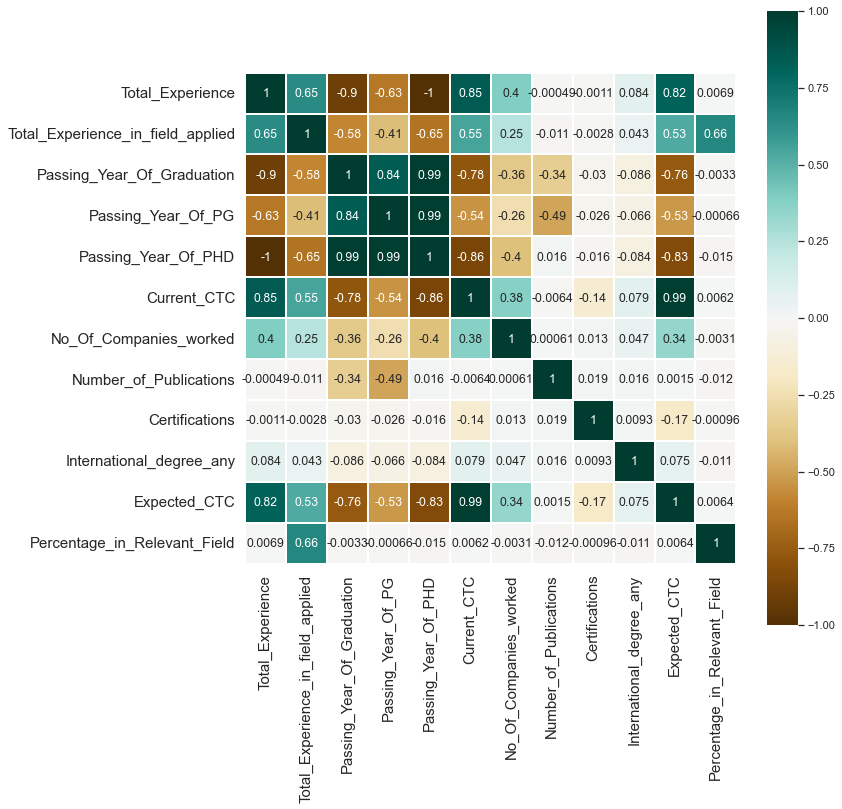

In [129]:

plt.figure(figsize=(11,11))
sns.heatmap(df.corr(),annot=True,cmap="BrBG",linewidth=0.99,square=True,annot_kws={"size":12.25})
plt.xticks(fontsize=15)
plt.yticks(size=15)
plt.show()

### Insights

* Total_Experience with Total_Experience_in_field_applied having quite good correlation  (0.65).

* Total_Experience with Passing_Year_Of_Graduation having  strong negative correlation.(-0.90).

* Total_Experience with Passing_Year_Of_PG shows negative correlation .(-0.63).

* Total_Experience with Current_CTC , Expected_CTC having strong correlation respectively . (0.85 and 0.82).

* Total_Experience with No_Of_Companies_worked having weak correlation .(0.40).

* Total_Experience_in_field_applied with Expected_CTC having moderate type of correlation . (0.53).

* Passing_Year_Of_Graduation with Expected_CTC shows negative correlation .(-0.76).

* Passing_Year_Of_PG with Expected_CTC having negative correlation .(-0.53).

* Passing_Year_Of_PHD with Expected_CTC having negative correlation .(-0.83).

* Current_CTC with Expected_CTC having very strong correlation (0.99).

* International_degree_any with Expected_CTC having very weak correlation .(0.07).

* Percentage_Relevant_Exp_in_Field with Expected_CTC having  very weak correlation. (0.01).

* Passing_Year_Of_Graduation with Current_CTC and Expected_CTC having negative correlation.(-0.78 & -0.76)respectively.

#### Pairplot
* Pairplot shows the relationship between the variables in the form of scatterplot and the distribution of the variable in the form of histogram.

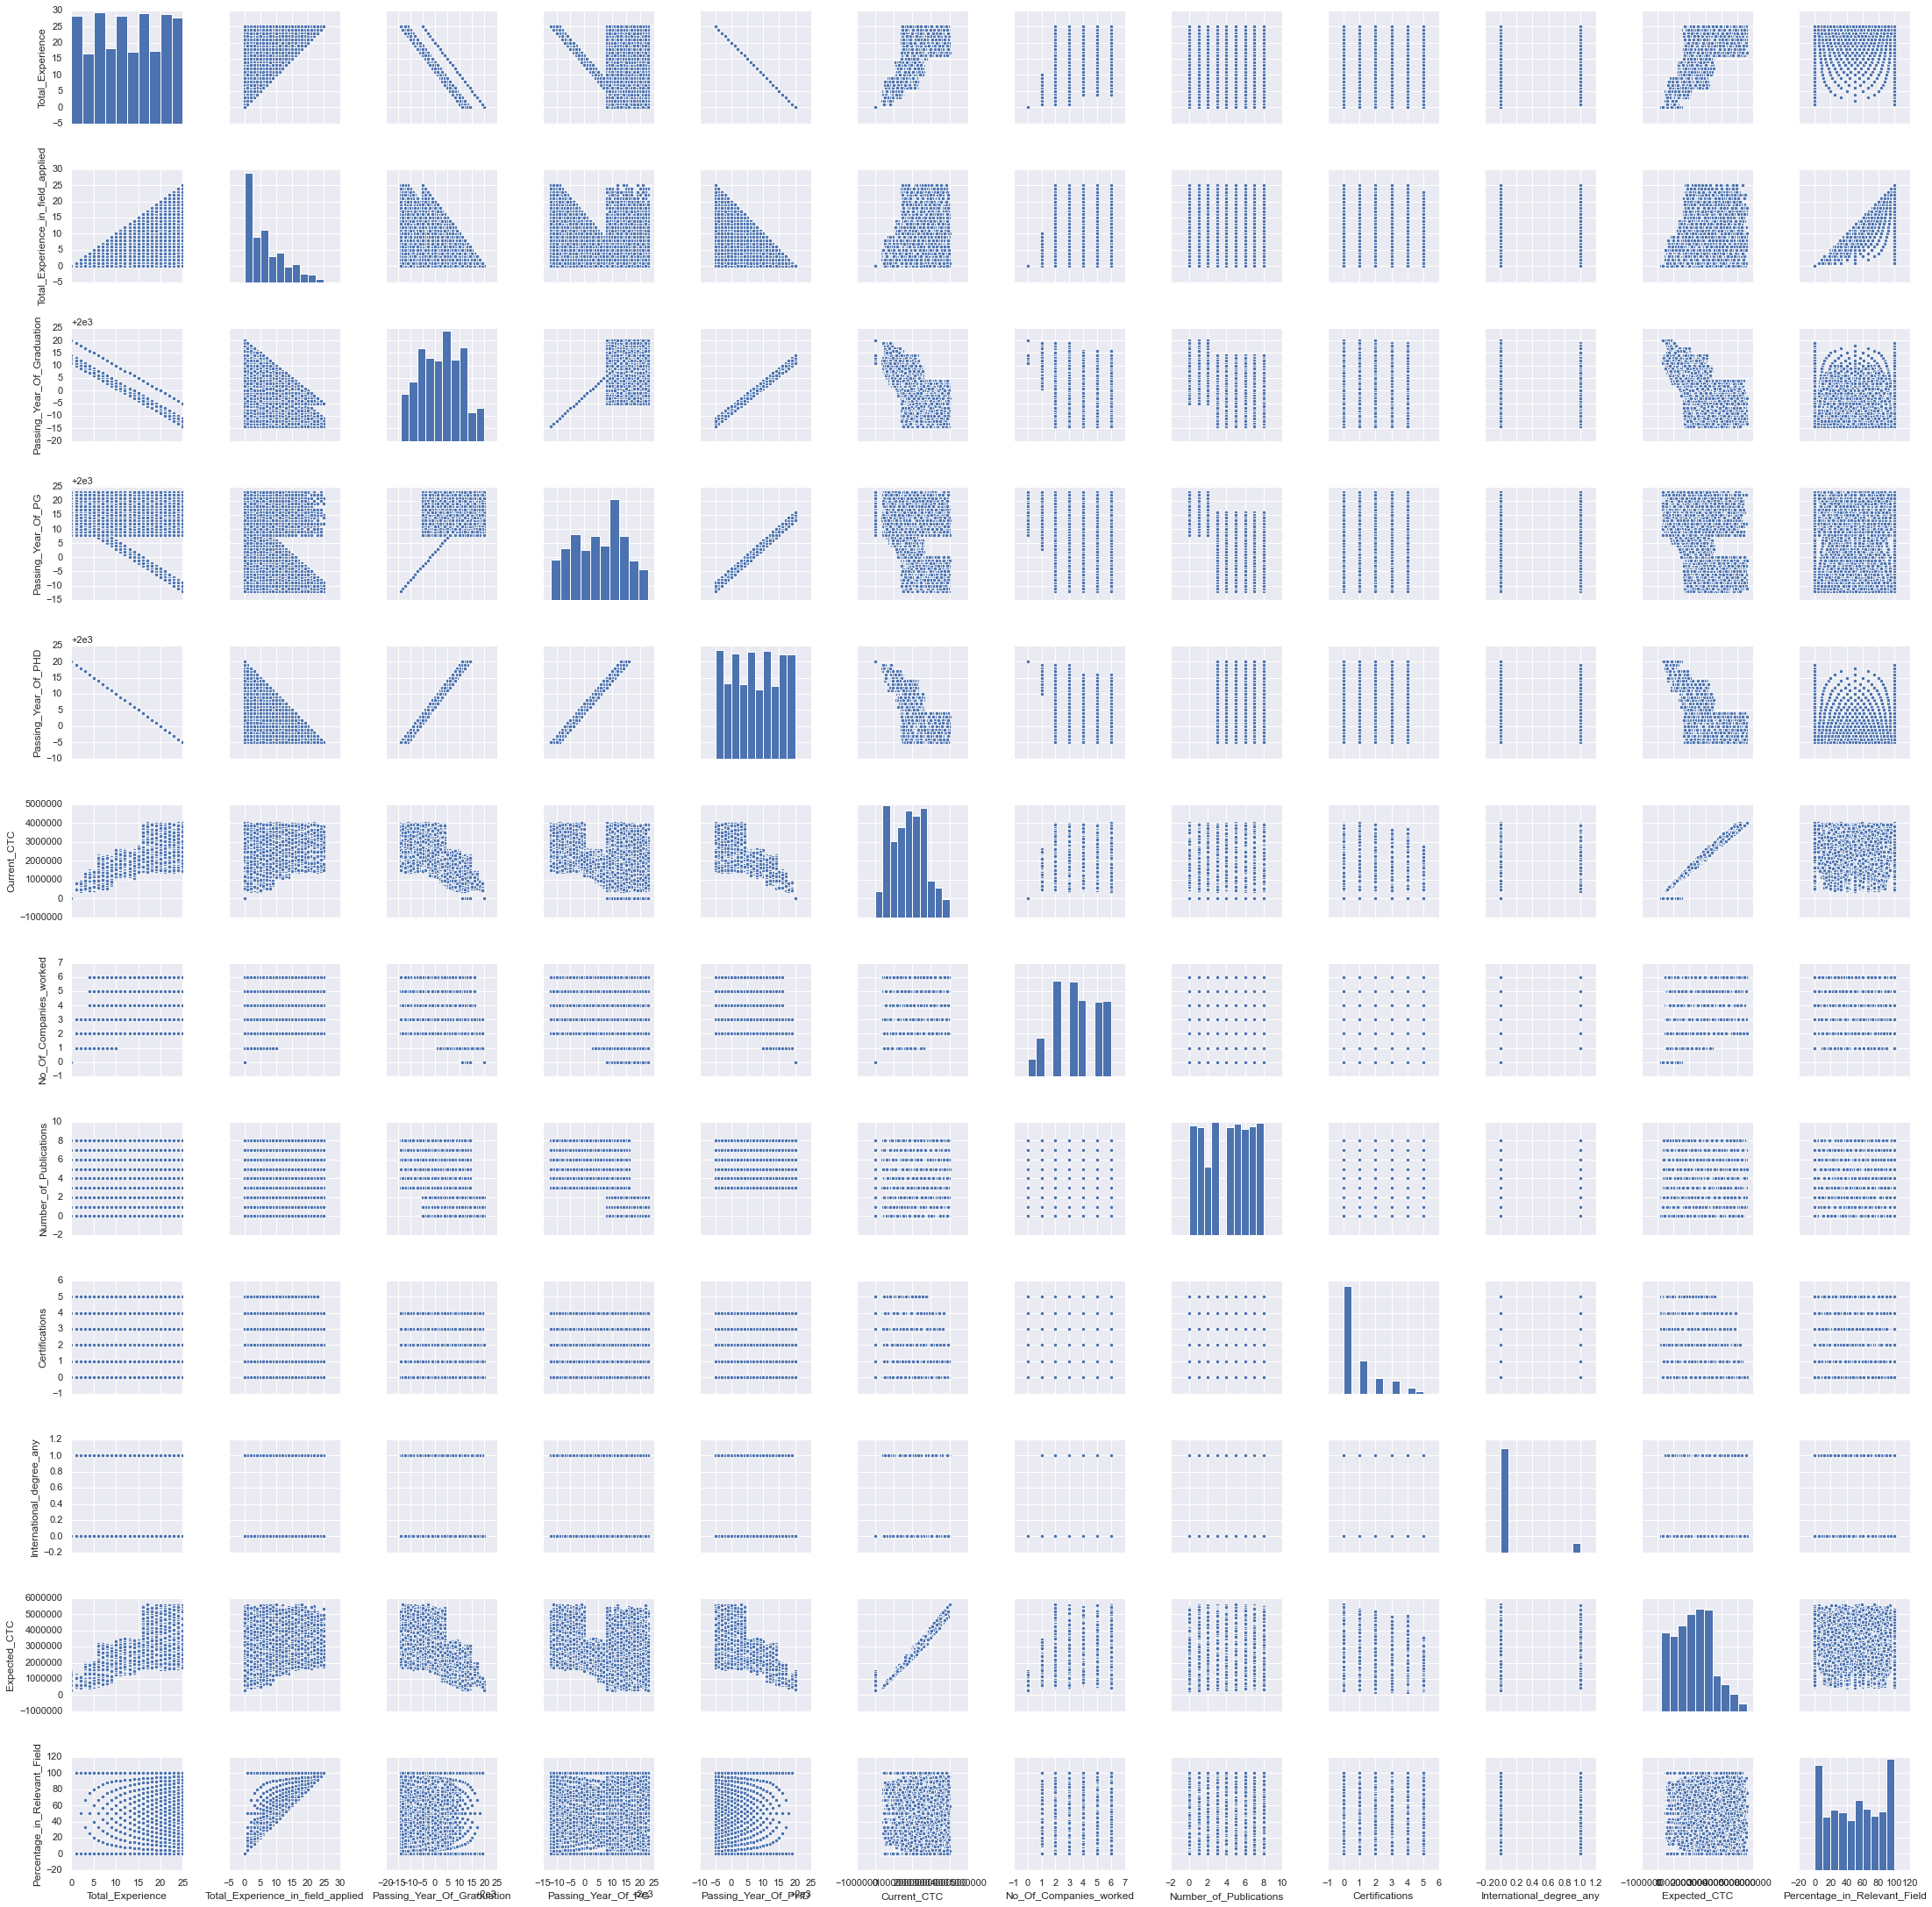

In [130]:
sns.pairplot(df)
plt.show()

### Insights

* Total_Experience having strong positive relationship with respect to Expected_CTC as the Total_Experience increases the Expected_CTC will also increases.


* Total_Experience_in_field_applied having quite cloudy relationship with respect to Expected_CTC.


* we can infer only that as the Total_Experience_in_field_applied is increases the Expected_CTC will also get slightly increases. 


* Passing_Year_Of_Graduation have negative relation with Expected_CTC as the oldest year having higher Expected_CTC where as the latest year has lowest Expected_CTC.


* Passing_Year_Of_PG has no clearly no such clear relationship with respect to Expected_CTC.


* Passing_Year_Of_PHD having negative corelation with the respect of Expected_CTC as the latest years having more Expected_CTC compared to past no of years.


*  Current_CTC having positive corelation with the respect of Expected_CTC as the Current_CTC is increasing the Expected_CTC is also increasing.

### Checking Outliers Treatment in the dataset

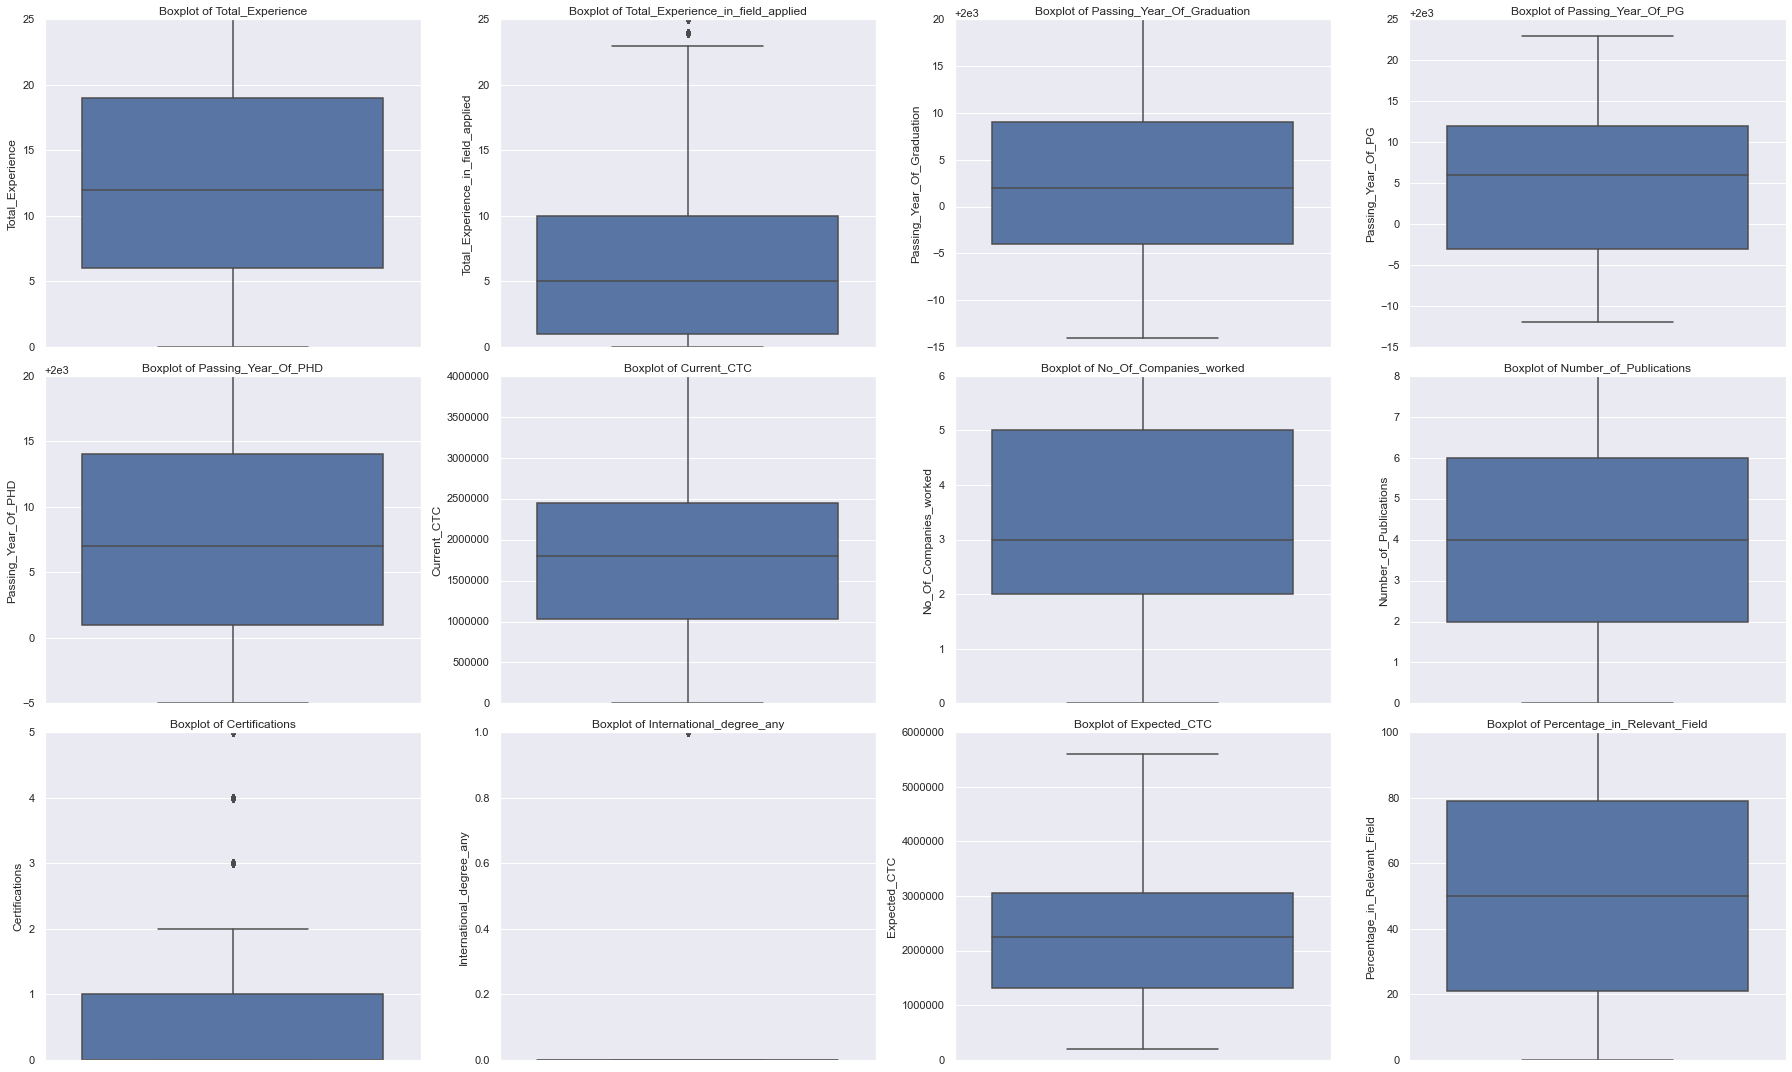

In [131]:
plt.figure(figsize= (25,15))
feature_list = df.dtypes[(df.dtypes!='object')].index
for i in range (len(feature_list)):
    plt.subplot(3,4 ,i+1)
    sns.boxplot(y= df[feature_list[i]],data=df)
    plt.title("Boxplot of {}".format(feature_list[i]))
    plt.tight_layout()

### Insights

* From the above box plots we can infer that there is only few columns in which outliers is present such as Total Experience in Field Applied , Certifications contains outliers.

* As per the context o the business problem we do not need the requirement to treat them.

### Treatment of Missing Values/Bad Values/Anomalies if present in the dataset.

In [132]:
df.isnull().sum()

Total_Experience                         0
Total_Experience_in_field_applied        0
Department                            2778
Role                                   963
Industry                               908
Organization                           908
Designation                           3129
Education                                0
Graduation_Specialization             6180
University_Grad                       6180
Passing_Year_Of_Graduation            6180
PG_Specialization                     7692
University_PG                         7692
Passing_Year_Of_PG                    7692
PHD_Specialization                   11881
University_PHD                       11881
Passing_Year_Of_PHD                  11881
Current_Location                         0
Preferred_location                       0
Current_CTC                              0
Inhand_Offer                             0
Last_Appraisal_Rating                  908
No_Of_Companies_worked                   0
Number_of_P

### Insights

* we observe that PG_Specialization , University_PG and Passing_Year_Of_PG have same number of missing values (7692) which indicates that data is not available or  these applicants have not  PG education.


* From above result we observe that University_Grad , Passing_Year_Of_Graduation and Graduation_Specialization   have same number of missing values (6180) which indicates that that data is not available.


* we observe that Passing_Year_Of_PHD, PHD_Specialization and University_PHD have same number of missing values (11881) which indicates that data is not available or these applicants have not  PG education.

### we have derived Null Values in form of  % in ascending order  -

In [133]:
null_percent=df.isnull().sum()/df.shape[0]
null_percent*100
print(null_percent.sort_values())

Total_Experience                     0.00000
Total_Experience_in_field_applied    0.00000
International_degree_any             0.00000
Certifications                       0.00000
Number_of_Publications               0.00000
No_Of_Companies_worked               0.00000
Education                            0.00000
Inhand_Offer                         0.00000
Current_CTC                          0.00000
Preferred_location                   0.00000
Current_Location                     0.00000
Expected_CTC                         0.00000
Last_Appraisal_Rating                0.03632
Percentage_in_Relevant_Field         0.03632
Organization                         0.03632
Industry                             0.03632
Role                                 0.03852
Department                           0.11112
Designation                          0.12516
Passing_Year_Of_Graduation           0.24720
University_Grad                      0.24720
Graduation_Specialization            0.24720
PG_Special

### Insights
* Total Experience,  Total Experience in field applied,  Education,  Current_Location,  Preferred_location, Current_CTC, Inhand_Offer,  No_of_Companies_Worked,  Certifications,  International_degree_any,  Expected_CTC has no null values apart from that all other feaures have null values.


* Maximum no of Null Values are present in the PHD_Specialization,  University_PHD , Passing_Year_Of_PHD.





#### We have to impute the missing values with the help of fillna function depending on the distribution of the feature/column and the observations that are distributed in that particular feature/column.


In [134]:
df["Department"].isnull().sum()

2778

In [135]:
df["Department"].unique()

array([nan, 'HR', 'Top Management', 'Banking', 'Sales', 'Engineering',
       'Others', 'Analytics/BI', 'Education', 'Marketing', 'Healthcare',
       'IT-Software', 'Accounts'], dtype=object)

##### There is nan value present in department column we have to change it with the "unidentified" 

In [136]:
df["Department"].fillna("unidentified",inplace=True)

In [137]:
df["Department"].isna().sum()

0

* We have successfully imputed the nan observaions in department column.

In [138]:
df["Role"].isna().sum()

963

In [139]:
df["Role"].fillna("unidentified",inplace=True)

In [140]:
df["Role"].isna().sum()

0

In [141]:
df["Role"].unique()

array(['unidentified', 'Consultant', 'Financial Analyst',
       'Project Manager', 'Area Sales Manager', 'Team Lead', 'Analyst',
       'Others', 'CEO', 'Business Analyst', 'Sales Manager',
       'Bio statistician', 'Scientist', 'Research Scientist', 'Head',
       'Associate', 'Senior Researcher', 'Sales Execituve',
       'Sr. Business Analyst', 'Principal Analyst', 'Data scientist',
       'Researcher', 'Senior Analyst', 'Professor', 'Lab Executuve'],
      dtype=object)

* We have successfully imputed the nan observaions in Role column.

In [142]:
df["Organization"].isna().sum()

908

In [143]:
df["Organization"].fillna("unidentified",inplace=True)

In [144]:
df["Organization"].isna().sum()

0

In [145]:
df["Organization"].unique()

array(['unidentified', 'H', 'J', 'F', 'E', 'G', 'L', 'M', 'O', 'D', 'N',
       'A', 'B', 'I', 'K', 'P', 'C'], dtype=object)

In [146]:
df["Industry"].isna().sum()

908

In [147]:
df["Industry"].fillna("unidentified",inplace=True)

In [148]:
df["Industry"].isna().sum()

0

In [149]:
df["Industry"].unique()

array(['unidentified', 'Analytics', 'Training', 'Aviation', 'Insurance',
       'Retail', 'FMCG', 'Others', 'Telecom', 'Automobile', 'IT', 'BFSI'],
      dtype=object)

In [150]:
df["Designation"].isna().sum()

3129

In [151]:
df["Designation"].fillna("unidentified",inplace=True)

In [152]:
df["Designation"].isna().sum()

0

In [153]:
df["Designation"].unique()

array(['unidentified', 'HR', 'Medical Officer', 'Director',
       'Marketing Manager', 'Manager', 'Product Manager', 'Consultant',
       'CA', 'Research Scientist', 'Sr.Manager', 'Data Analyst',
       'Assistant Manager', 'Others', 'Web Designer', 'Research Analyst',
       'Software Developer', 'Network Engineer', 'Scientist'],
      dtype=object)

In [154]:
df["Graduation_Specialization"].isna().sum()

6180

In [155]:
df["Graduation_Specialization"].fillna("unidentified",inplace=True)

In [156]:
df["Graduation_Specialization"].isna().sum()

0

In [157]:
df["Graduation_Specialization"].unique()

array(['Arts', 'Chemistry', 'Zoology', 'Others', 'Sociology',
       'Psychology', 'Mathematics', 'unidentified', 'Engineering',
       'Botony', 'Statistics', 'Economics'], dtype=object)

In [158]:
df["University_Grad"].isna().sum()

6180

In [159]:
df["University_Grad"].fillna("unidentified",inplace=True)

In [160]:
df["University_Grad"].isna().sum()

0

In [161]:
df["University_Grad"].unique()

array(['Lucknow', 'Surat', 'Jaipur', 'Bangalore', 'Mumbai', 'Delhi',
       'Mangalore', 'unidentified', 'Nagpur', 'Kolkata', 'Ahmedabad',
       'Guwahati', 'Pune', 'Bhubaneswar'], dtype=object)

In [162]:
df["University_PG"].isna().sum()

7692

In [163]:
df["University_PG"].fillna("unidentified",inplace=True)

In [164]:
df["University_PG"].isna().sum()

0

In [165]:
df["University_PG"].unique()

array(['unidentified', 'Surat', 'Jaipur', 'Bangalore', 'Mumbai', 'Delhi',
       'Mangalore', 'Nagpur', 'Kolkata', 'Lucknow', 'Ahmedabad',
       'Guwahati', 'Pune', 'Bhubaneswar'], dtype=object)

In [166]:
df["PG_Specialization"].isna().sum()

7692

In [167]:
df["PG_Specialization"].fillna("unidentified",inplace=True)

In [168]:
df["PG_Specialization"].isna().sum()

0

In [169]:
df["PG_Specialization"].unique()

array(['unidentified', 'Others', 'Zoology', 'Chemistry', 'Psychology',
       'Mathematics', 'Engineering', 'Sociology', 'Arts', 'Statistics',
       'Economics', 'Botony'], dtype=object)

In [170]:
df["PHD_Specialization"].isna().sum()

11881

In [171]:
df["PHD_Specialization"].fillna("unidentified",inplace=True)

In [172]:
df["PHD_Specialization"].isna().sum()

0

In [173]:
df["PHD_Specialization"].unique()

array(['unidentified', 'Chemistry', 'Zoology', 'Others', 'Psychology',
       'Engineering', 'Botony', 'Arts', 'Statistics', 'Economics',
       'Mathematics', 'Sociology'], dtype=object)

In [174]:
df["University_PHD"].isna().sum()

11881

In [175]:
df["University_PHD"].fillna("unidentified",inplace=True)

In [176]:
df["University_PHD"].isna().sum()

0

In [177]:
df["University_PHD"].unique()

array(['unidentified', 'Mangalore', 'Lucknow', 'Guwahati', 'Bangalore',
       'Bhubaneswar', 'Pune', 'Jaipur', 'Surat', 'Kolkata', 'Delhi',
       'Mumbai', 'Nagpur', 'Ahmedabad'], dtype=object)

In [178]:
df["Last_Appraisal_Rating"].isna().sum()

908

In [179]:
df["Last_Appraisal_Rating"].fillna("unidentified",inplace=True)

In [180]:
df["Last_Appraisal_Rating"].isna().sum()

0

In [181]:
df["Last_Appraisal_Rating"].unique()

array(['unidentified', 'Key_Performer', 'C', 'B', 'A', 'D'], dtype=object)

#### Missing Value Treatment for Numerical Features -we can impute the missing value according to the context of the business problem with 0 nd kind of the  distribution of the particular feature with the help of mean or median.

In [182]:
df["Passing_Year_Of_Graduation"].isnull().sum()

6180

In [183]:
df["Passing_Year_Of_Graduation"].fillna(df["Passing_Year_Of_Graduation"].median(),inplace=True)

In [184]:
df["Passing_Year_Of_Graduation"].isnull().sum()

0

In [185]:
df["Passing_Year_Of_PG"].isnull().sum()

7692

In [186]:
df["Passing_Year_Of_PG"].fillna(0,inplace=True)

In [187]:
df["Passing_Year_Of_PG"].isnull().sum()

0

In [188]:
df["Passing_Year_Of_PG"].unique()

array([   0., 1990., 1992., 1999., 2006., 2000., 2013., 2005., 2002.,
       2014., 2004., 2009., 2017., 2001., 1995., 2011., 1991., 1993.,
       2003., 2007., 2010., 1994., 2020., 2016., 1998., 2012., 2022.,
       1988., 2019., 2018., 1997., 2008., 2015., 1989., 2021., 1996.,
       2023.])

In [189]:
df["Passing_Year_Of_PHD"].isnull().sum()

11881

In [190]:
df["Passing_Year_Of_PHD"].fillna(0,inplace=True)

In [191]:
df["Passing_Year_Of_PHD"].isnull().sum()

0

In [192]:
df["Passing_Year_Of_PHD"].unique()

array([   0., 1997., 1999., 2005., 2010., 2004., 2019., 2012., 2007.,
       2013., 2020., 2008., 2003., 2017., 2015., 1996., 2018., 1995.,
       1998., 2014., 2009., 2016., 2011., 2006., 2002., 2001., 2000.])

#### we have successfully imputed the blank values that is not given in the Passing_Year_Of_PG and Passing_Year_Of_PHD Column with 0 because in this approach if the data point is missing in terms of education qualification we can not impute it with the diatance based techinque like Decision Tree or KNN Imputation Method or median or mean value  that will led to against the business prospective and domain of the business problem because it does not mean that if someone is not completed his/her education in terms of PHD or PG we can not fill it.so we imputed with 0.

In [193]:
df["Percentage_in_Relevant_Field"].isnull().sum()

908

In [194]:
df["Percentage_in_Relevant_Field"].fillna(0,inplace=True)

In [195]:
df["Percentage_in_Relevant_Field"].isnull().sum()

0

In [196]:
df.isnull().sum()

Total_Experience                     0
Total_Experience_in_field_applied    0
Department                           0
Role                                 0
Industry                             0
Organization                         0
Designation                          0
Education                            0
Graduation_Specialization            0
University_Grad                      0
Passing_Year_Of_Graduation           0
PG_Specialization                    0
University_PG                        0
Passing_Year_Of_PG                   0
PHD_Specialization                   0
University_PHD                       0
Passing_Year_Of_PHD                  0
Current_Location                     0
Preferred_location                   0
Current_CTC                          0
Inhand_Offer                         0
Last_Appraisal_Rating                0
No_Of_Companies_worked               0
Number_of_Publications               0
Certifications                       0
International_degree_any 

##### Now we have successfully imputed all the null values with the help of median and in some cases with 0 according to the context of the business problem.

<div class="girk">
<span class="mark"><span class="girk"><span class="burk">Checking Normality on target feature/variable that is Expected_CTC</span></span></span></div><i class="fa fa-lightbulb-o "></i>

### Anderson Darling Test for Normality - Here we apply this test on the target variable Expected_CTC to check weather the distribution is normal or not?

#### Hypthesis For Anderson Darling Test for Normality

##### H0 : Expected_CTC is normally Distributed.

###### H1 : Expected_CTC is not normally distributed.

In [197]:
from scipy.stats import anderson
anderson(df["Expected_CTC"])

AndersonResult(statistic=145.17631491729117, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

### Conclusion : As per the test hypothesis if p_value < 0.05 ,we have to reject the null hypothesis ,or if the p_value > 0.05 , then fail to reject null hyphothesis or we have to accept null hypothesis.

#### As we found that the p_value > 0.05. We fail to reject the null hypothesis and conclude that Expected_CTC distribution is normal, so we do not need right now any kind of transformation if in further process in model building process if required we can go for this.


### Encoding and after model building process  --In next 2nd Notes to be Continue:---------------

### Capstone Project Note-2 Encoding and Model Building Process steps after imputation is done..

#### lets first check the head of the dataframe.

In [198]:
df.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,PG_Specialization,University_PG,Passing_Year_Of_PG,PHD_Specialization,University_PHD,Passing_Year_Of_PHD,Current_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC,Percentage_in_Relevant_Field
0,0,0,unidentified,unidentified,unidentified,unidentified,unidentified,PG,Arts,Lucknow,2020.0,unidentified,unidentified,0.0,unidentified,unidentified,0.0,Guwahati,Pune,0,N,unidentified,0,0,0,0,384551,0.0
1,23,14,HR,Consultant,Analytics,H,HR,Doctorate,Chemistry,Surat,1988.0,Others,Surat,1990.0,Chemistry,Mangalore,1997.0,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729,61.0
2,21,12,Top Management,Consultant,Training,J,unidentified,Doctorate,Zoology,Jaipur,1990.0,Zoology,Jaipur,1992.0,Zoology,Lucknow,1999.0,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325,57.0
3,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,Others,Bangalore,1997.0,Zoology,Bangalore,1999.0,Chemistry,Guwahati,2005.0,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833,53.0
4,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,Zoology,Mumbai,2004.0,Zoology,Mumbai,2006.0,Zoology,Bangalore,2010.0,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390,50.0


#### lets check tail of the dataframe.

In [199]:
df.tail()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,PG_Specialization,University_PG,Passing_Year_Of_PG,PHD_Specialization,University_PHD,Passing_Year_Of_PHD,Current_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC,Percentage_in_Relevant_Field
24995,18,13,Engineering,Project Manager,Automobile,I,Assistant Manager,PG,Psychology,Surat,1995.0,Psychology,Surat,1997.0,Psychology,Jaipur,2002.0,Kanpur,Mumbai,3410899,N,B,3,6,0,0,4434168,72.0
24996,12,8,HR,Others,Analytics,B,Sr.Manager,Under Grad,unidentified,unidentified,2002.0,unidentified,unidentified,0.0,unidentified,unidentified,0.0,Bangalore,Nagpur,1350793,Y,B,6,7,0,0,1756030,67.0
24997,22,8,Banking,Head,Insurance,D,Software Developer,Under Grad,unidentified,unidentified,2002.0,unidentified,unidentified,0.0,unidentified,unidentified,0.0,Pune,Delhi,1681796,N,C,4,5,2,0,1934065,36.0
24998,25,8,Marketing,CEO,BFSI,D,Marketing Manager,PG,Economics,Surat,1995.0,Economics,Surat,2012.0,unidentified,unidentified,0.0,Delhi,Pune,3311090,Y,B,3,1,1,0,4370638,32.0
24999,8,0,Banking,Consultant,Automobile,P,Sr.Manager,Grad,Economics,Bangalore,2004.0,Economics,Bangalore,2006.0,Economics,Guwahati,2012.0,Surat,Mangalore,935897,N,A,2,6,0,0,1216666,0.0


In [200]:
df.isnull().sum()

Total_Experience                     0
Total_Experience_in_field_applied    0
Department                           0
Role                                 0
Industry                             0
Organization                         0
Designation                          0
Education                            0
Graduation_Specialization            0
University_Grad                      0
Passing_Year_Of_Graduation           0
PG_Specialization                    0
University_PG                        0
Passing_Year_Of_PG                   0
PHD_Specialization                   0
University_PHD                       0
Passing_Year_Of_PHD                  0
Current_Location                     0
Preferred_location                   0
Current_CTC                          0
Inhand_Offer                         0
Last_Appraisal_Rating                0
No_Of_Companies_worked               0
Number_of_Publications               0
Certifications                       0
International_degree_any 

##### Now we are going to drop the unwanted columns/features that are not making any significant relation with the target column on the model building process and  according to the domain or the context of the business problem.

In [201]:
df.drop(["University_Grad","PG_Specialization","University_PG","Industry","Organization",
        "Graduation_Specialization","PHD_Specialization","University_PHD","Current_Location","Preferred_location"],
        axis=1,inplace=True)

#### Checking head of the Dataset after dropping the above column.

In [202]:
df.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Designation,Education,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC,Percentage_in_Relevant_Field
0,0,0,unidentified,unidentified,unidentified,PG,2020.0,0.0,0.0,0,N,unidentified,0,0,0,0,384551,0.0
1,23,14,HR,Consultant,HR,Doctorate,1988.0,1990.0,1997.0,2702664,Y,Key_Performer,2,4,0,0,3783729,61.0
2,21,12,Top Management,Consultant,unidentified,Doctorate,1990.0,1992.0,1999.0,2236661,Y,Key_Performer,5,3,0,0,3131325,57.0
3,15,8,Banking,Financial Analyst,HR,Doctorate,1997.0,1999.0,2005.0,2100510,N,C,5,3,0,0,2608833,53.0
4,10,5,Sales,Project Manager,Medical Officer,Grad,2004.0,2006.0,2010.0,1931644,N,C,2,3,0,0,2221390,50.0


#### Info of the dataframe

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  int64  
 1   Total_Experience_in_field_applied  25000 non-null  int64  
 2   Department                         25000 non-null  object 
 3   Role                               25000 non-null  object 
 4   Designation                        25000 non-null  object 
 5   Education                          25000 non-null  object 
 6   Passing_Year_Of_Graduation         25000 non-null  float64
 7   Passing_Year_Of_PG                 25000 non-null  float64
 8   Passing_Year_Of_PHD                25000 non-null  float64
 9   Current_CTC                        25000 non-null  int64  
 10  Inhand_Offer                       25000 non-null  object 
 11  Last_Appraisal_Rating              25000 non-null  obj

##### Insights:- Now we have 18 features along with the target column.

##### Now we have to perform label Encoding & Combining of the equivalent labels  for the Categorical Variables on the basis of of their median because on median there will be no such major impact of outlliers.

In [204]:
df["Department"].value_counts()

unidentified      2778
Marketing         2379
Analytics/BI      2096
Healthcare        2062
Others            2041
Sales             1991
HR                1988
Banking           1952
Education         1948
Engineering       1937
Top Management    1632
Accounts          1118
IT-Software       1078
Name: Department, dtype: int64

Text(0.5, 1.0, 'Department wise Expected CTC')

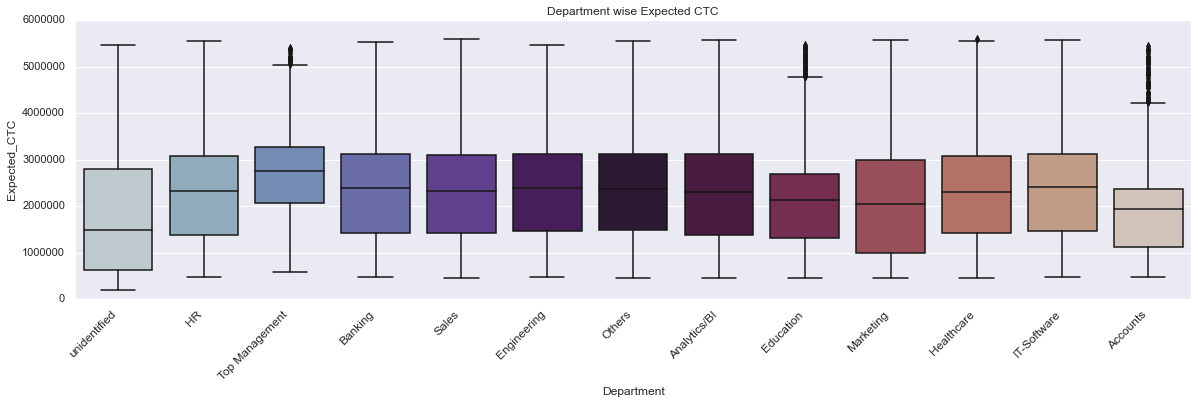

In [205]:
plt.figure(figsize=(20,5))
pic=sns.boxplot(x="Department", y="Expected_CTC", data=df, palette="twilight")
pic.set_xticklabels(pic.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.title('Department wise Expected CTC')


#### From the above plot we can see that there is some labels are in the same range and some have high median value and some have low median value so we are going to merge the labels according to the equivalent range and name them according to their median value like Top ,Medium  and Low.

#### Lets replace the values of some of the categorical variable with meaningful labels so it eases our EDA process and helps in getting insights.

In [206]:
df.Department.replace(to_replace='Top Management',value='Top_Dept', inplace=True)

In [207]:
df.Department.replace(to_replace='HR',value='Mid_Dept', inplace=True)

In [208]:
df.Department.replace(to_replace='Banking',value='Mid_Dept', inplace=True)

In [209]:
df.Department.replace(to_replace='Sales',value='Mid_Dept', inplace=True)

In [210]:
df.Department.replace(to_replace='Engineering',value='Mid_Dept', inplace=True)

In [211]:
df.Department.replace(to_replace='Others',value='Mid_Dept', inplace=True)

In [212]:
df.Department.replace(to_replace='Analytics/BI',value='Mid_Dept', inplace=True)

In [213]:
df.Department.replace(to_replace='Healthcare',value='Mid_Dept', inplace=True)

In [214]:
df.Department.replace(to_replace='IT-Software',value='Mid_Dept', inplace=True)

In [215]:
df.Department.replace(to_replace='Marketing',value='Mid_Dept', inplace=True)

In [216]:
df.Department.replace(to_replace='Education',value='Low_Dept', inplace=True)

In [217]:
df.Department.replace(to_replace='Accounts',value='Low_Dept', inplace=True)

In [218]:
df.Department.replace(to_replace='unidentified',value='Least_Dept', inplace=True)

In [219]:
df.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Designation,Education,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC,Percentage_in_Relevant_Field
0,0,0,Least_Dept,unidentified,unidentified,PG,2020.0,0.0,0.0,0,N,unidentified,0,0,0,0,384551,0.0
1,23,14,Mid_Dept,Consultant,HR,Doctorate,1988.0,1990.0,1997.0,2702664,Y,Key_Performer,2,4,0,0,3783729,61.0
2,21,12,Top_Dept,Consultant,unidentified,Doctorate,1990.0,1992.0,1999.0,2236661,Y,Key_Performer,5,3,0,0,3131325,57.0
3,15,8,Mid_Dept,Financial Analyst,HR,Doctorate,1997.0,1999.0,2005.0,2100510,N,C,5,3,0,0,2608833,53.0
4,10,5,Mid_Dept,Project Manager,Medical Officer,Grad,2004.0,2006.0,2010.0,1931644,N,C,2,3,0,0,2221390,50.0


In [220]:
df["Department"].value_counts()

Mid_Dept      17524
Low_Dept       3066
Least_Dept     2778
Top_Dept       1632
Name: Department, dtype: int64

#### Now we have to perform Lable Encoding for Department column.

In [221]:
df.Department.replace(to_replace='Top_Dept',value="3", inplace=True)

In [222]:
df.Department.replace(to_replace='Mid_Dept',value="2", inplace=True)

In [223]:
df.Department.replace(to_replace='Low_Dept',value="1", inplace=True)

In [224]:
df.Department.replace(to_replace='Least_Dept',value="0", inplace=True)

#### Now we have to perform label encoding for Role Feature.

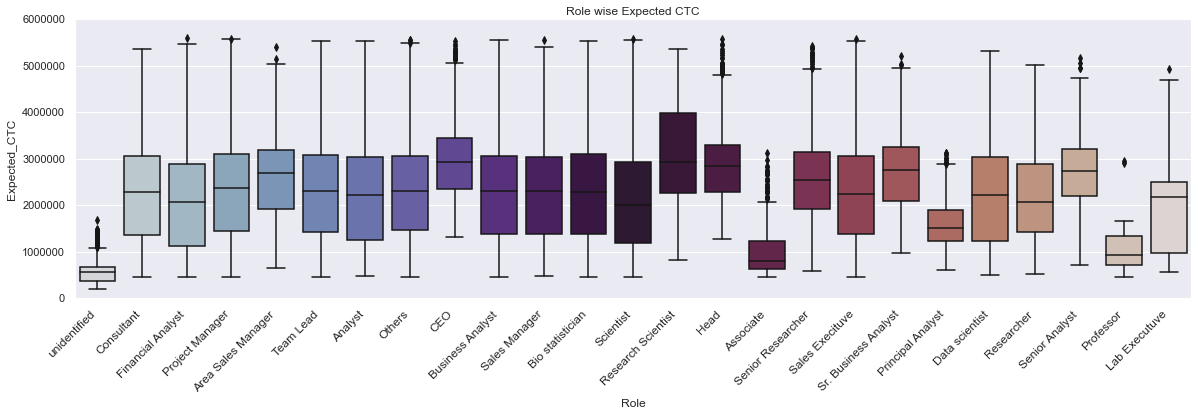

In [225]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x="Role", y="Expected_CTC", data=df, palette="twilight")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.title('Role wise Expected CTC')
chart;

#### From the above graph we can combine the sub-levels of Role Feature according to their median values

#### Top level

In [226]:

df.Role.replace(to_replace='Research Scientist',value='Top_level', inplace=True)

In [227]:

df.Role.replace(to_replace='CEO',value='Top_level', inplace=True)

In [228]:

df.Role.replace(to_replace='Head',value='Top_level', inplace=True)

In [229]:

df.Role.replace(to_replace='Sr. Business Analyst',value='Top_level', inplace=True)

In [230]:

df.Role.replace(to_replace='Senior Analyst',value='Top_level', inplace=True)

In [231]:
df.Role.replace(to_replace='Area Sales Manager',value='Top_level', inplace=True)

#### Mid Level

In [232]:
df.Role.replace(to_replace='Financial Analyst',value='Mid_level', inplace=True)
df.Role.replace(to_replace='Consultant',value='Mid_level', inplace=True)
df.Role.replace(to_replace='Analyst',value='Mid_level', inplace=True)
df.Role.replace(to_replace='Team Lead',value='Mid_level', inplace=True)
df.Role.replace(to_replace='Project Manager',value='Mid_level', inplace=True)
df.Role.replace(to_replace='Business Analyst',value='Mid_level', inplace=True)
df.Role.replace(to_replace='Sales Manager',value='Mid_level', inplace=True)
df.Role.replace(to_replace='Lab Executuve',value='Mid_level', inplace=True)
df.Role.replace(to_replace='Others',value='Mid_level', inplace=True)
df.Role.replace(to_replace='Bio statistician',value='Mid_level', inplace=True)
df.Role.replace(to_replace='Researcher',value='Mid_level', inplace=True)
df.Role.replace(to_replace='Scientist',value='Mid_level', inplace=True)
df.Role.replace(to_replace='Sales Execituve',value='Mid_level', inplace=True)
df.Role.replace(to_replace='Data scientist',value='Mid_level', inplace=True)
df.Role.replace(to_replace='Senior Researcher',value='Mid_level', inplace=True)


#### Low level Roles

In [233]:
df.Role.replace(to_replace='Principal Analyst',value='Low_level', inplace=True)
df.Role.replace(to_replace='Professor',value='Low_level', inplace=True)
df.Role.replace(to_replace='Associate',value='Low_level', inplace=True)
df.Role.replace(to_replace='unidentified',value='Low_level', inplace=True)

In [234]:
df["Role"].value_counts()

Mid_level    20296
Top_level     2666
Low_level     2038
Name: Role, dtype: int64

#### Lable Encoding of Role

In [235]:
df.Role.replace(to_replace='Top_level',value="2", inplace=True)
df.Role.replace(to_replace='Mid_level',value="1", inplace=True)
df.Role.replace(to_replace='Low_level',value="0", inplace=True)

In [236]:
df["Role"].value_counts()

1    20296
2     2666
0     2038
Name: Role, dtype: int64

In [237]:
df["Designation"].value_counts()

unidentified          3129
HR                    1648
Others                1647
Manager               1628
Product Manager       1626
Sr.Manager            1617
Consultant            1606
Assistant Manager     1590
Marketing Manager     1590
Data Analyst          1575
Research Analyst      1563
Medical Officer       1047
Software Developer     914
Web Designer           882
Network Engineer       862
Director               772
CA                     715
Research Scientist     537
Scientist               52
Name: Designation, dtype: int64

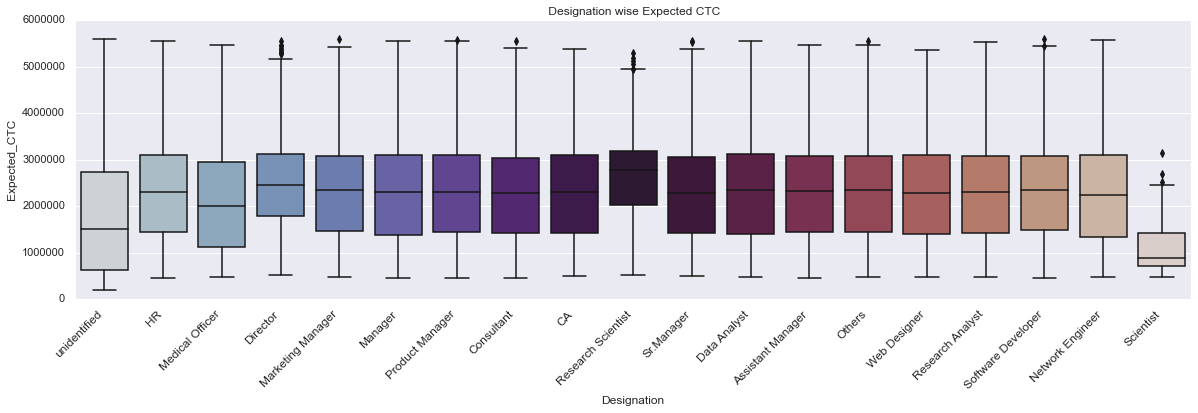

In [238]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Designation", y="Expected_CTC", data=df, palette="twilight")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.title(' Designation wise Expected CTC')
chart;

#### From the above plot we can see that there is some labels are in the same range and some have high median value and some have low median value so we are going to merge the labels according to the equivalent range and name them according to their median value like Top ,Medium and Low.

In [239]:
df.Designation.replace(to_replace='Research Scientist',value='Top_Post_level', inplace=True)

In [240]:
df.Designation.replace(to_replace='Marketing Manager',value='Mid_Post_level', inplace=True)
df.Designation.replace(to_replace='HR',value='Mid_Post_level', inplace=True)
df.Designation.replace(to_replace='Director',value='Mid_Post_level', inplace=True)
df.Designation.replace(to_replace='Manager',value='Mid_Post_level', inplace=True)
df.Designation.replace(to_replace='Consultant',value='Mid_Post_level', inplace=True)
df.Designation.replace(to_replace='CA',value='Mid_Post_level', inplace=True)
df.Designation.replace(to_replace='Sr.Manager',value='Mid_Post_level', inplace=True)
df.Designation.replace(to_replace='Assistant Manager',value='Mid_Post_level', inplace=True)
df.Designation.replace(to_replace='Data Analyst',value='Mid_Post_level', inplace=True)
df.Designation.replace(to_replace='Product Manager',value='Mid_Post_level', inplace=True)
df.Designation.replace(to_replace='Medical Officer',value='Mid_Post_level', inplace=True)
df.Designation.replace(to_replace='Network Engineer',value='Mid_Post_level', inplace=True)
df.Designation.replace(to_replace='Research Scientist',value='Mid_Post_level', inplace=True)
df.Designation.replace(to_replace='Web Designer',value='Mid_Post_level', inplace=True)
df.Designation.replace(to_replace='Others',value='Mid_Post_level', inplace=True)
df.Designation.replace(to_replace='Research Analyst',value='Mid_Post_level', inplace=True)
df.Designation.replace(to_replace='Software Developer',value='Mid_Post_level', inplace=True)

In [241]:
df.Designation.replace(to_replace='unidentified',value='Low_Post_level', inplace=True)
df.Designation.replace(to_replace='Scientist',value='Low_Post_level', inplace=True)

In [242]:
df.Designation.value_counts()

Mid_Post_level    21282
Low_Post_level     3181
Top_Post_level      537
Name: Designation, dtype: int64

#### Now we have to perform Lable Encoding of Designation

In [243]:
df.Designation.replace(to_replace='Top_Post_level',value="2", inplace=True)
df.Designation.replace(to_replace='Mid_Post_level',value="1", inplace=True)
df.Designation.replace(to_replace='Low_Post_level',value="0", inplace=True)

In [244]:
df.Designation.value_counts()

1    21282
0     3181
2      537
Name: Designation, dtype: int64

#### Now we have to perform Lable Encoding of  Education

In [245]:
df["Education"].value_counts()

PG            6326
Doctorate     6285
Grad          6209
Under Grad    6180
Name: Education, dtype: int64

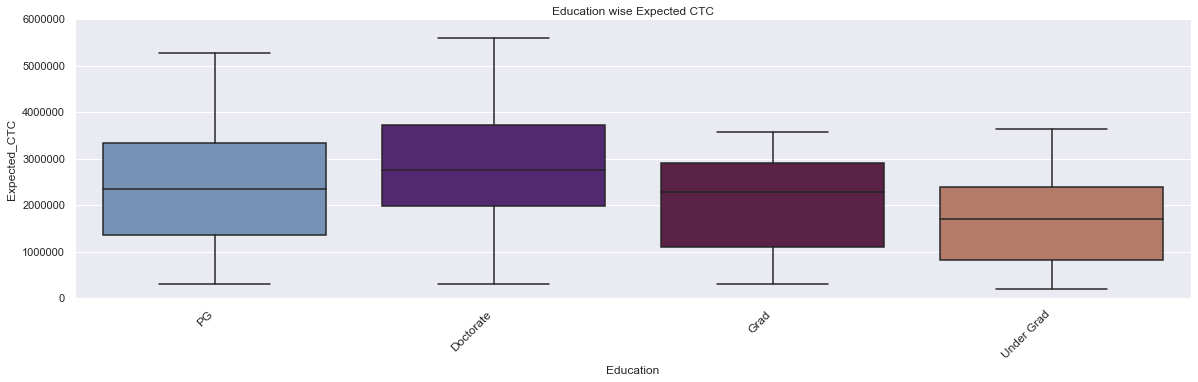

In [246]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Education", y="Expected_CTC", data=df, palette="twilight")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.title('Education wise Expected CTC')
chart;

In [247]:
df.Education.replace(to_replace='PG',value='2', inplace=True)
df.Education.replace(to_replace='Doctorate',value='3', inplace=True)
df.Education.replace(to_replace='Grad',value='1', inplace=True)
df.Education.replace(to_replace='Under Grad',value='0', inplace=True)

In [248]:
df.Education.value_counts()

2    6326
3    6285
1    6209
0    6180
Name: Education, dtype: int64

#### Now we have to perform Lable Encoding of Inhand_Offer

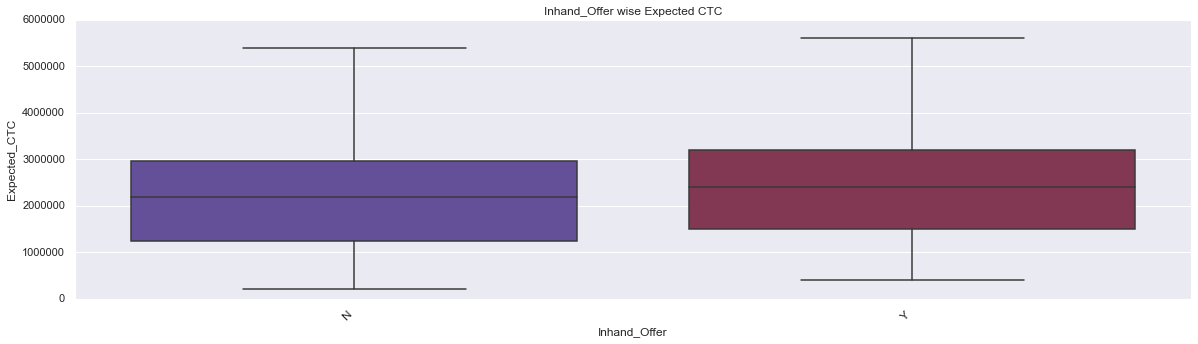

In [249]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Inhand_Offer", y="Expected_CTC", data=df, palette="twilight")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.title('Inhand_Offer wise Expected CTC')
chart;

In [250]:
df.Inhand_Offer.value_counts()

N    17418
Y     7582
Name: Inhand_Offer, dtype: int64

In [251]:
df.Inhand_Offer.replace(to_replace='Y',value='1', inplace=True)
df.Inhand_Offer.replace(to_replace='N',value='0', inplace=True)


In [252]:
df.Inhand_Offer.value_counts()

0    17418
1     7582
Name: Inhand_Offer, dtype: int64

#### Now we have to perform Lable Encoding of Last_Appraisal_Rating

In [253]:
df["Last_Appraisal_Rating"].value_counts()

B                5501
D                4917
C                4812
A                4671
Key_Performer    4191
unidentified      908
Name: Last_Appraisal_Rating, dtype: int64

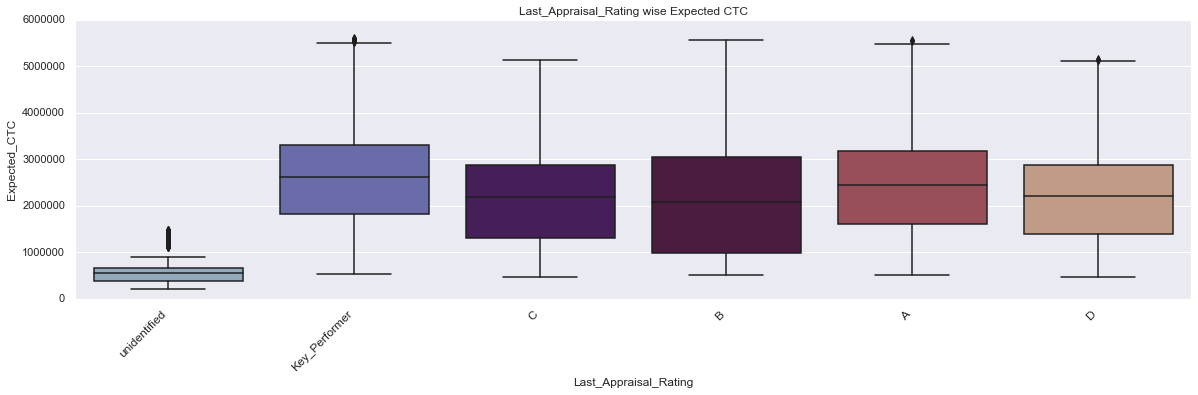

In [254]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Last_Appraisal_Rating", y="Expected_CTC", data=df, palette="twilight")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.title('Last_Appraisal_Rating wise Expected CTC')
chart;

#### From the above graph median value of C,B and D near by same apart from that Key_Performer is on the higher side after that A is comes and lastly unidentified,so we can label them according to the median value distribution with respect to target column.

In [255]:

df.Last_Appraisal_Rating.replace(to_replace='C',value='B', inplace=True)

In [256]:

df.Last_Appraisal_Rating.replace(to_replace='D',value='B', inplace=True)

In [257]:

df.Last_Appraisal_Rating.replace(to_replace='Key_Performer',value='A', inplace=True)

In [258]:
df.Last_Appraisal_Rating.value_counts()

B               15230
A                8862
unidentified      908
Name: Last_Appraisal_Rating, dtype: int64

In [259]:

df.Last_Appraisal_Rating.replace(to_replace='A',value='2', inplace=True)

df.Last_Appraisal_Rating.replace(to_replace='B',value='1', inplace=True)

df.Last_Appraisal_Rating.replace(to_replace='unidentified',value='0', inplace=True)

In [260]:
df.Last_Appraisal_Rating.value_counts()

1    15230
2     8862
0      908
Name: Last_Appraisal_Rating, dtype: int64

#### Now lets  Checking the Dataset after Encoding

In [261]:
df.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Designation,Education,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC,Percentage_in_Relevant_Field
0,0,0,0,0,0,2,2020.0,0.0,0.0,0,0,0,0,0,0,0,384551,0.0
1,23,14,2,1,1,3,1988.0,1990.0,1997.0,2702664,1,2,2,4,0,0,3783729,61.0
2,21,12,3,1,0,3,1990.0,1992.0,1999.0,2236661,1,2,5,3,0,0,3131325,57.0
3,15,8,2,1,1,3,1997.0,1999.0,2005.0,2100510,0,1,5,3,0,0,2608833,53.0
4,10,5,2,1,1,1,2004.0,2006.0,2010.0,1931644,0,1,2,3,0,0,2221390,50.0


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  int64  
 1   Total_Experience_in_field_applied  25000 non-null  int64  
 2   Department                         25000 non-null  object 
 3   Role                               25000 non-null  object 
 4   Designation                        25000 non-null  object 
 5   Education                          25000 non-null  object 
 6   Passing_Year_Of_Graduation         25000 non-null  float64
 7   Passing_Year_Of_PG                 25000 non-null  float64
 8   Passing_Year_Of_PHD                25000 non-null  float64
 9   Current_CTC                        25000 non-null  int64  
 10  Inhand_Offer                       25000 non-null  object 
 11  Last_Appraisal_Rating              25000 non-null  obj

#### Converting the Datatypes of encoded variables(object) into int64

In [263]:
df['Department'] = df['Department'].astype('int64')
df['Role'] = df['Role'].astype('int64')
df['Designation'] = df['Designation'].astype('int64')
df['Education'] = df['Education'].astype('int64')
df['Inhand_Offer'] = df['Inhand_Offer'].astype('int64')
df['Last_Appraisal_Rating'] = df['Last_Appraisal_Rating'].astype('int64')

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  int64  
 1   Total_Experience_in_field_applied  25000 non-null  int64  
 2   Department                         25000 non-null  int64  
 3   Role                               25000 non-null  int64  
 4   Designation                        25000 non-null  int64  
 5   Education                          25000 non-null  int64  
 6   Passing_Year_Of_Graduation         25000 non-null  float64
 7   Passing_Year_Of_PG                 25000 non-null  float64
 8   Passing_Year_Of_PHD                25000 non-null  float64
 9   Current_CTC                        25000 non-null  int64  
 10  Inhand_Offer                       25000 non-null  int64  
 11  Last_Appraisal_Rating              25000 non-null  int

## 1). Model building and interpretation.

* a. Build various models (You can choose to build models for either or all of descriptive, predictive or prescriptive purposes)

* b. Test your predictive model against the test set using various appropriate performance metrics

* c.Interpretation of the model(s)

In [265]:
df.to_csv('Encoded_Hr_Data') #Encoded_Hr_Data this dataset contain encoded data which we use for Multiple Model Building.

#### Now we have to perform Train-Test Split for Model Building

In [266]:
X = df.drop('Expected_CTC',axis=1)
Y = df[['Expected_CTC']]

##### Now we have to  Split X(independent variable) and Y (dependent variable) into training and test set in 70:30 ratio.

In [267]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [268]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)


##### Now we have to perform Linear Regression Model-1 using Sklearn.

In [269]:
from sklearn.linear_model import LinearRegression

In [270]:

regression_model= LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [271]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Total_Experience is -7875.7006988648345
The coefficient for Total_Experience_in_field_applied is 10331.296058151447
The coefficient for Department is -38555.332840246694
The coefficient for Role is -76588.19499331282
The coefficient for Designation is -97100.79148970016
The coefficient for Education is 92821.4193490013
The coefficient for Passing_Year_Of_Graduation is -3782.6905138905327
The coefficient for Passing_Year_Of_PG is -26.514071003045565
The coefficient for Passing_Year_Of_PHD is -17.25954826464948
The coefficient for Current_CTC is 1.245143148699813
The coefficient for Inhand_Offer is 81329.3083211779
The coefficient for Last_Appraisal_Rating is 83404.77691671914
The coefficient for No_Of_Companies_worked is -14005.82673701161
The coefficient for Number_of_Publications is 3363.2220575701826
The coefficient for Certifications is 51.77055637779263
The coefficient for International_degree_any is 33802.22612299101
The coefficient for Percentage_in_Relevant_F

##### Lets check the  Intercept for the Model

In [272]:
# Let us check the intercept for the model

intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is [7791186.37783288]


In [273]:
# R square on training data
regression_model.score(X_train, Y_train)

0.9854357636298562

In [274]:
# R square on testing data
regression_model.score(X_test, Y_test)

0.9861489871486351

#### Insights-R square is quite similar and good  on both training as well as testing data this may be due to the data itself that is given .
#### we can perform various type of ensemble technique to perform the more accurate results in terms of accuracy and performance metrices.

In [275]:
from sklearn import metrics

In [276]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, Y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(Y_train,predicted_train))

139510.23524866343

In [277]:
#RMSE on Testing data
predicted_test= regression_model.fit(X_train,Y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(Y_test,predicted_test))

137786.14281034478

##### Linear Regression Model-2 Using statsmodels.

In [278]:
# concatenate X and y into a single dataframe
new_train = pd.concat([X_train, Y_train], axis=1)
new_test=pd.concat([X_test,Y_test],axis=1)
new_train.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Designation,Education,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Percentage_in_Relevant_Field,Expected_CTC
4289,16,6,3,2,1,2,2004.0,2021.0,0.0,2599539,0,1,2,1,0,0,38.0,3109048
19621,12,11,2,1,1,0,2002.0,0.0,0.0,1590046,1,2,3,6,3,0,92.0,2067059
14965,25,13,2,2,1,3,1995.0,2013.0,0.0,3641226,0,2,6,0,0,0,52.0,4915655
12321,14,0,2,1,1,0,2002.0,0.0,0.0,1567804,0,1,3,3,2,0,0.0,1959755
6269,20,17,2,1,1,3,1991.0,1993.0,2000.0,3344366,0,2,5,3,0,0,85.0,4514894


In [279]:
new_test.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Designation,Education,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Percentage_in_Relevant_Field,Expected_CTC
21492,8,3,2,1,1,1,2012.0,2013.0,0.0,935207,0,2,6,1,0,0,38.0,1215769
9488,14,6,2,1,1,2,1998.0,2000.0,2006.0,1419998,0,1,3,5,1,0,43.0,1845997
16933,19,13,2,1,1,1,1993.0,1995.0,2001.0,2446313,0,1,5,7,1,0,68.0,2813259
12604,4,3,2,1,1,1,2008.0,2010.0,2016.0,573222,0,1,6,7,2,0,75.0,659205
8222,2,0,2,0,1,3,2010.0,2012.0,2018.0,419866,1,1,3,4,0,0,0.0,587812


In [280]:
new_train.shape


(17500, 18)

In [281]:
new_test.shape


(7500, 18)

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  int64  
 1   Total_Experience_in_field_applied  25000 non-null  int64  
 2   Department                         25000 non-null  int64  
 3   Role                               25000 non-null  int64  
 4   Designation                        25000 non-null  int64  
 5   Education                          25000 non-null  int64  
 6   Passing_Year_Of_Graduation         25000 non-null  float64
 7   Passing_Year_Of_PG                 25000 non-null  float64
 8   Passing_Year_Of_PHD                25000 non-null  float64
 9   Current_CTC                        25000 non-null  int64  
 10  Inhand_Offer                       25000 non-null  int64  
 11  Last_Appraisal_Rating              25000 non-null  int

In [283]:
expr= 'Expected_CTC ~ Total_Experience + Total_Experience_in_field_applied + Department + Role + Designation + Education + Passing_Year_Of_Graduation + Passing_Year_Of_PG + Passing_Year_Of_PHD + Current_CTC + Inhand_Offer + Last_Appraisal_Rating + No_Of_Companies_worked + Number_of_Publications + Certifications+ International_degree_any + Percentage_in_Relevant_Field'            

In [284]:
import statsmodels.formula.api as smf
lm_train= smf.ols(formula=expr, data=new_train).fit()
lm_train.params

Intercept                            7.791186e+06
Total_Experience                    -7.875701e+03
Total_Experience_in_field_applied    1.033130e+04
Department                          -3.855533e+04
Role                                -7.658819e+04
Designation                         -9.710079e+04
Education                            9.282142e+04
Passing_Year_Of_Graduation          -3.782691e+03
Passing_Year_Of_PG                  -2.651407e+01
Passing_Year_Of_PHD                 -1.725955e+01
Current_CTC                          1.245143e+00
Inhand_Offer                         8.132931e+04
Last_Appraisal_Rating                8.340478e+04
No_Of_Companies_worked              -1.400583e+04
Number_of_Publications               3.363222e+03
Certifications                       5.177056e+01
International_degree_any             3.380223e+04
Percentage_in_Relevant_Field        -1.704181e+03
dtype: float64

In [285]:
print(lm_train.summary())

                            OLS Regression Results                            
Dep. Variable:           Expected_CTC   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 6.958e+04
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        18:21:35   Log-Likelihood:            -2.3213e+05
No. Observations:               17500   AIC:                         4.643e+05
Df Residuals:                   17482   BIC:                         4.644e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

#### Hypothesis Testing

* H0 : There is no relationship between independent and the dependent variable.

* H1 : There is a relationship between independent and the dependent variable.

We observe that the pvalue of Certifications variable is 0.960. We know that if pvalue < 0.5 reject the null hypohesis & if pvalue > 0.5 we fail to reject the null hypothesis or accept the null hypothesis..Here we found that pvalue of Certifications is 0.960 which greater than 0.05. So, we fail to reject the null hypothesis.
####  Certifications is not good variable to predict the expected_ctc so we can drop it and build he model again and check the statsmodel summary and rmse and accuracy of the model again.

In [286]:
import statsmodels.formula.api as smf
lm_test= smf.ols(formula=expr, data=new_test).fit()
lm_test.params

Intercept                            7.773887e+06
Total_Experience                    -7.328975e+03
Total_Experience_in_field_applied    9.911968e+03
Department                          -3.895129e+04
Role                                -7.709134e+04
Designation                         -8.914310e+04
Education                            9.252267e+04
Passing_Year_Of_Graduation          -3.784183e+03
Passing_Year_Of_PG                  -2.214585e+01
Passing_Year_Of_PHD                 -2.075936e+01
Current_CTC                          1.245538e+00
Inhand_Offer                         9.205233e+04
Last_Appraisal_Rating                7.990296e+04
No_Of_Companies_worked              -1.211996e+04
Number_of_Publications               3.214784e+03
Certifications                      -7.533559e+02
International_degree_any             2.788989e+04
Percentage_in_Relevant_Field        -1.629514e+03
dtype: float64

In [287]:
print(lm_test.summary())

                            OLS Regression Results                            
Dep. Variable:           Expected_CTC   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 3.146e+04
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        18:21:35   Log-Likelihood:                -99378.
No. Observations:                7500   AIC:                         1.988e+05
Df Residuals:                    7482   BIC:                         1.989e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

#### hypothesis Testing
H0 : There is no relationship between independent and the dependent variable.

H1 : There is a relationship between independent and the dependent variable.

### we observe that the p value of Certifications variable is 0.624. We know that if pvalue < 0.5 reject the null hypohesis & if pvalue > 0.5 we fail to reject the null hypothesis or accept the null hypothesis..Here we found that pvalue of Certifications is 0.624 which greater than 0.05. So, we fail to reject the null hypothesis.

#### Calculate MSE of Train Data

In [288]:

mse= np.mean((lm_train.predict(new_train.drop('Expected_CTC',axis=1))-new_train['Expected_CTC'])**2)
mse

19463105739.137466

In [289]:
np.sqrt(mse)

139510.23524866364

#### Calculate MSE of Test Data

In [290]:
mse2= np.mean((lm_test.predict(new_test.drop('Expected_CTC',axis=1))-new_test['Expected_CTC'])**2)
mse2

18907844955.043385

In [291]:
np.sqrt(mse2)

137505.7997142062

#### Prediction on Train & Test data

In [292]:
y_pred_train = lm_train.predict(new_train)
y_pred_test = lm_test.predict(new_test)

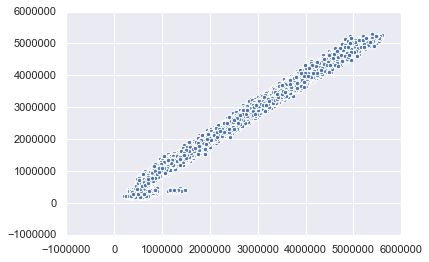

In [293]:
plt.scatter(Y_train['Expected_CTC'],y_pred_train)
plt.show()

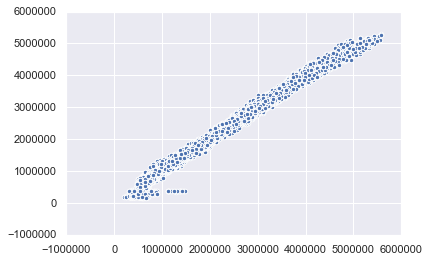

In [294]:
plt.scatter(Y_test['Expected_CTC'],y_pred_test)
plt.show()

#### Insights -

From the above result Certifications variable/feature has p-value more than 0.05 which indicates us that Certifications feature is not important for predicting the expected_ctc our target variable.


### Linear Rregression Model using : 2 ( Z-Score )

In [295]:
df_model_2=pd.read_csv('Encoded_Hr_Data')

In [296]:
df_model_2

,Unnamed: 0,Total_Experience,Total_Experience_in_field_applied,Department,Role,Designation,Education,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC,Percentage_in_Relevant_Field
0,0,0,0,0,0,0,2,2020.0,0.0,0.0,0,0,0,0,0,0,0,384551,0.0
1,1,23,14,2,1,1,3,1988.0,1990.0,1997.0,2702664,1,2,2,4,0,0,3783729,61.0
2,2,21,12,3,1,0,3,1990.0,1992.0,1999.0,2236661,1,2,5,3,0,0,3131325,57.0
3,3,15,8,2,1,1,3,1997.0,1999.0,2005.0,2100510,0,1,5,3,0,0,2608833,53.0
4,4,10,5,2,1,1,1,2004.0,2006.0,2010.0,1931644,0,1,2,3,0,0,2221390,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24995,18,13,2,1,1,2,1995.0,1997.0,2002.0,3410899,0,1,3,6,0,0,4434168,72.0
24996,24996,12,8,2,1,1,0,2002.0,0.0,0.0,1350793,1,1,6,7,0,0,1756030,67.0
24997,24997,22,8,2,2,1,0,2002.0,0.0,0.0,1681796,0,1,4,5,2,0,1934065,36.0
24998,24998,25,8,2,2,1,2,1995.0,2012.0,0.0,3311090,1,1,3,1,1,0,4370638,32.0


In [297]:
df_model_2.drop(["Unnamed: 0"],axis=1,inplace=True)

In [298]:
df_model_2.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Designation,Education,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC,Percentage_in_Relevant_Field
0,0,0,0,0,0,2,2020.0,0.0,0.0,0,0,0,0,0,0,0,384551,0.0
1,23,14,2,1,1,3,1988.0,1990.0,1997.0,2702664,1,2,2,4,0,0,3783729,61.0
2,21,12,3,1,0,3,1990.0,1992.0,1999.0,2236661,1,2,5,3,0,0,3131325,57.0
3,15,8,2,1,1,3,1997.0,1999.0,2005.0,2100510,0,1,5,3,0,0,2608833,53.0
4,10,5,2,1,1,1,2004.0,2006.0,2010.0,1931644,0,1,2,3,0,0,2221390,50.0


#### Train-Test Split for Linear Regression Model

In [299]:
X2 = df_model_2.drop('Expected_CTC',axis=1)
Y2 = df_model_2[['Expected_CTC']]

In [300]:
X2

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Designation,Education,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Percentage_in_Relevant_Field
0,0,0,0,0,0,2,2020.0,0.0,0.0,0,0,0,0,0,0,0,0.0
1,23,14,2,1,1,3,1988.0,1990.0,1997.0,2702664,1,2,2,4,0,0,61.0
2,21,12,3,1,0,3,1990.0,1992.0,1999.0,2236661,1,2,5,3,0,0,57.0
3,15,8,2,1,1,3,1997.0,1999.0,2005.0,2100510,0,1,5,3,0,0,53.0
4,10,5,2,1,1,1,2004.0,2006.0,2010.0,1931644,0,1,2,3,0,0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,18,13,2,1,1,2,1995.0,1997.0,2002.0,3410899,0,1,3,6,0,0,72.0
24996,12,8,2,1,1,0,2002.0,0.0,0.0,1350793,1,1,6,7,0,0,67.0
24997,22,8,2,2,1,0,2002.0,0.0,0.0,1681796,0,1,4,5,2,0,36.0
24998,25,8,2,2,1,2,1995.0,2012.0,0.0,3311090,1,1,3,1,1,0,32.0


In [301]:
Y2

,Expected_CTC
0,384551
1,3783729
2,3131325
3,2608833
4,2221390
...,...
24995,4434168
24996,1756030
24997,1934065
24998,4370638


#### Split X and Y into training and test set in 70:30 ratio.

In [302]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X2, Y2, test_size=0.30 , random_state=1)

In [303]:
from scipy.stats import zscore

X_train_scaled  = X_train_2.apply(zscore)
X_test_scaled = X_test_2.apply(zscore)
y_train_scaled = Y_train_2.apply(zscore)
y_test_scaled = Y_test_2.apply(zscore)


In [304]:
X_train_scaled.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Designation,Education,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Percentage_in_Relevant_Field
4289,0.471308,-0.048497,1.720631,2.250312,0.281815,0.431962,0.253142,0.681995,-1.053168,0.916354,-0.659289,-0.588530,-0.876107,-1.185336,-0.644641,-0.299212,-0.305179
19621,-0.063826,0.804631,0.377707,-0.056146,0.281815,-1.357019,-0.023395,-1.503906,-1.053168,-0.183934,1.516786,1.268534,-0.284623,0.727166,1.863039,-0.299212,1.288151
14965,1.675361,1.145882,0.377707,2.250312,0.281815,1.326453,-0.991274,0.673342,-1.053168,2.051731,-0.659289,1.268534,1.489832,-1.567837,-0.644641,-0.299212,0.107906
12321,0.203741,-1.072250,0.377707,-0.056146,0.281815,-1.357019,-0.023395,-1.503906,-1.053168,-0.208177,-0.659289,-0.588530,-0.284623,-0.420335,1.027146,-0.299212,-1.426412
6269,1.006443,1.828385,0.377707,-0.056146,0.281815,1.326453,-1.544348,0.651710,0.942083,1.728171,-0.659289,1.268534,0.898347,-0.420335,-0.644641,-0.299212,1.081609


### lets perform the LinearRegression function.

In [305]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [306]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train_2.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    

The coefficient for Total_Experience is -0.05092418163596045
The coefficient for Total_Experience_in_field_applied is 0.05237794668530744
The coefficient for Department is -0.024835381454620005
The coefficient for Role is -0.02872460870435031
The coefficient for Designation is -0.03127023856689118
The coefficient for Education is 0.089765641548738
The coefficient for Passing_Year_Of_Graduation is -0.02366549207875398
The coefficient for Passing_Year_Of_PG is -0.021205579313856648
The coefficient for Passing_Year_Of_PHD is -0.014965789712132005
The coefficient for Current_CTC is 0.9882208458359613
The coefficient for Inhand_Offer is 0.03233039380381115
The coefficient for Last_Appraisal_Rating is 0.03885095999869427
The coefficient for No_Of_Companies_worked is -0.020483440011908105
The coefficient for Number_of_Publications is 0.007606086886444415
The coefficient for Certifications is 5.3575938286870876e-05
The coefficient for International_degree_any is 0.008030161802295911
The coeffi

#### Intercept for the model

In [307]:
intercept = regression_model.intercept_[0]
intercept

-2.653867058572929e-16

#### R square on training data

In [308]:
regression_model.score(X_train_scaled,y_train_scaled)

0.9854357636298562

#### R square on test data

In [309]:
regression_model.score(X_test_scaled,y_test_scaled)

0.986154596005444

#### RMSE on Training data

In [310]:
#RMSE on Training data
predicted_train_2= regression_model.fit(X_train_2,Y_train_2).predict(X_train_2)
np.sqrt(metrics.mean_squared_error(Y_train_2,predicted_train_2))

139510.23524866343

#### RMSE on Test data

In [311]:
predicted_test_2= regression_model.fit(X_test_2,Y_test_2).predict(X_test_2)
np.sqrt(metrics.mean_squared_error(Y_test_2,predicted_test_2))

137505.79971420625

### Note:-The result for Normal Linear Regression Model and with Z-score is simlar there is no such a quite difference in the RMSE of above two model. 
    

#### Now we have to perform XG Boost Model 

### XG Boost Model 3 : 

In [312]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [313]:
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [314]:
df_model_3=pd.read_csv('Encoded_Hr_Data')

In [315]:
df_model_3

,Unnamed: 0,Total_Experience,Total_Experience_in_field_applied,Department,Role,Designation,Education,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC,Percentage_in_Relevant_Field
0,0,0,0,0,0,0,2,2020.0,0.0,0.0,0,0,0,0,0,0,0,384551,0.0
1,1,23,14,2,1,1,3,1988.0,1990.0,1997.0,2702664,1,2,2,4,0,0,3783729,61.0
2,2,21,12,3,1,0,3,1990.0,1992.0,1999.0,2236661,1,2,5,3,0,0,3131325,57.0
3,3,15,8,2,1,1,3,1997.0,1999.0,2005.0,2100510,0,1,5,3,0,0,2608833,53.0
4,4,10,5,2,1,1,1,2004.0,2006.0,2010.0,1931644,0,1,2,3,0,0,2221390,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24995,18,13,2,1,1,2,1995.0,1997.0,2002.0,3410899,0,1,3,6,0,0,4434168,72.0
24996,24996,12,8,2,1,1,0,2002.0,0.0,0.0,1350793,1,1,6,7,0,0,1756030,67.0
24997,24997,22,8,2,2,1,0,2002.0,0.0,0.0,1681796,0,1,4,5,2,0,1934065,36.0
24998,24998,25,8,2,2,1,2,1995.0,2012.0,0.0,3311090,1,1,3,1,1,0,4370638,32.0


In [316]:
df_model_3.drop(["Unnamed: 0"],axis=1,inplace=True)

In [317]:
df_model_3

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Designation,Education,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC,Percentage_in_Relevant_Field
0,0,0,0,0,0,2,2020.0,0.0,0.0,0,0,0,0,0,0,0,384551,0.0
1,23,14,2,1,1,3,1988.0,1990.0,1997.0,2702664,1,2,2,4,0,0,3783729,61.0
2,21,12,3,1,0,3,1990.0,1992.0,1999.0,2236661,1,2,5,3,0,0,3131325,57.0
3,15,8,2,1,1,3,1997.0,1999.0,2005.0,2100510,0,1,5,3,0,0,2608833,53.0
4,10,5,2,1,1,1,2004.0,2006.0,2010.0,1931644,0,1,2,3,0,0,2221390,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,18,13,2,1,1,2,1995.0,1997.0,2002.0,3410899,0,1,3,6,0,0,4434168,72.0
24996,12,8,2,1,1,0,2002.0,0.0,0.0,1350793,1,1,6,7,0,0,1756030,67.0
24997,22,8,2,2,1,0,2002.0,0.0,0.0,1681796,0,1,4,5,2,0,1934065,36.0
24998,25,8,2,2,1,2,1995.0,2012.0,0.0,3311090,1,1,3,1,1,0,4370638,32.0


In [318]:
X3 = df_model_3.drop('Expected_CTC',axis=1)
Y3 = df_model_3[['Expected_CTC']]

In [325]:
X3

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Designation,Education,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Percentage_in_Relevant_Field
0,0,0,0,0,0,2,2020.0,0.0,0.0,0,0,0,0,0,0,0,0.0
1,23,14,2,1,1,3,1988.0,1990.0,1997.0,2702664,1,2,2,4,0,0,61.0
2,21,12,3,1,0,3,1990.0,1992.0,1999.0,2236661,1,2,5,3,0,0,57.0
3,15,8,2,1,1,3,1997.0,1999.0,2005.0,2100510,0,1,5,3,0,0,53.0
4,10,5,2,1,1,1,2004.0,2006.0,2010.0,1931644,0,1,2,3,0,0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,18,13,2,1,1,2,1995.0,1997.0,2002.0,3410899,0,1,3,6,0,0,72.0
24996,12,8,2,1,1,0,2002.0,0.0,0.0,1350793,1,1,6,7,0,0,67.0
24997,22,8,2,2,1,0,2002.0,0.0,0.0,1681796,0,1,4,5,2,0,36.0
24998,25,8,2,2,1,2,1995.0,2012.0,0.0,3311090,1,1,3,1,1,0,32.0


In [320]:
# Splitting
train_X, test_X, train_y, test_y = train_test_split(X3, Y3,
                      test_size = 0.3, random_state = 123)
  

In [321]:
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
  

In [322]:
# Fitting the model
xgb_r.fit(train_X, train_y)

[18:22:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, ...)

In [323]:
# Predict the model
pred = xgb_r.predict(test_X)

In [1]:
RMSE Computation
rmse = np.sqrt(MSE(train_y, pred))
print("RMSE : % f" %(rmse))

#### Note:- we can see from the above result the RMSE of the Xg Boost Model is quite good as compare to the the above two model.

## 2). Model Tuning and business implication

a.Ensemble modelling, wherever applicable	 
b. Any other model tuning measures(if applicable)	 
c. Interpretation of the most optimum model and its implication on the business

#### Ensemble means a group of elements viewed as a whole rather than individually. An Ensemble method creates multiple models and combines them to solve it. Ensemble methods help to improve the robustness/generalizability of the model.

#### Basic ensemble methods
1. Averaging method: It is mainly used for regression problems. The method consists of building multiple models independently and returning the average of the prediction of all the models. In general, the combined output is better than an individual output because variance is reduced.

In the below example, three regression models (linear regression, xgboost, and random forest) are trained and their predictions are averaged. The final prediction output is pred_final.

In [ ]:
 importing machine learning models for prediction
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression

In [ ]:
df_model_4=pd.read_csv('Encoded_Hr_Data')

In [ ]:
df_model_4

In [ ]:
df_model_4.drop(["Unnamed: 0"],axis=1,inplace=True)

In [ ]:
df_model_4

In [ ]:
X4 = df_model_4.drop('Expected_CTC',axis=1)
Y4 = df_model_4[['Expected_CTC']]

In [ ]:
 Splitting
train_X, test_X, train_y, test_y = train_test_split(X4, Y4,
                      #test_size = 0.3, random_state = 123)
  

In [ ]:
 initializing all the model objects with default parameters
model_lr = LinearRegression()
model_xgb = xgb.XGBRegressor()
model_rfr = RandomForestRegressor()
 

In [ ]:
 training all the model on the training dataset
model_lr.fit(train_X, train_y)


In [ ]:
model_xgb.fit(train_X, train_y)

In [ ]:
model_rfr.fit(train_X, train_y)

In [ ]:
 predicting the output on the test dataset
pred_1 = model_lr.predict(test_X)
pred_2 = model_xgb.predict(test_X)
pred_3 = model_rfr.predict(test_X)
 

In [ ]:
pred_1

In [ ]:
pred_2

In [ ]:
pred_3

In [ ]:
 final prediction after averaging on the prediction of all 3 models
pred_final = (pred_1+pred_2+pred_3)/3.0

In [ ]:
pred_final

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
pred_final

In [ ]:
 printing the root mean squared error between real value and predicted value
print(mean_squared_error(test_y, pred_1))

In [ ]:
 printing the root mean squared error between real value and predicted value
print(mean_squared_error(test_y, pred_2))

In [ ]:
 printing the root mean squared error between real value and predicted value
print(mean_squared_error(test_y, pred_3))

#### Insights --From the above model that we have build so far XG Boost model perform quite good on that having least RMSE so can go with this model. 

#### Hyperparameter tuning

### A Machine Learning model is defined as a mathematical model with a number of parameters that need to be learned from the data. By training a model with existing data, we are able to fit the model parameters.
However, there is another kind of parameters, known as Hyperparameters, that cannot be directly learned from the regular training process. They are usually fixed before the actual training process begins. These parameters express important properties of the model such as its complexity or how fast it should learn.

The aim of this article is to explore various strategies to tune hyperparameter for Machine learning model.

#### Models can have many hyperparameters and finding the best combination of parameters can be treated as a search problem. Two best strategies for Hyperparameter tuning are:

* GridSearchCV
* RandomizedSearchCV

#### Lets perform one example of Random Search Cv using Decison Tree 

In [ ]:
#Necessary imports
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
             # "max_features": randint(1, 9),
              #"min_samples_leaf": randint(1, 9),
             # "criterion": ["gini", "entropy"]}
  

In [ ]:
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
  

In [ ]:
 Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv=2)

In [ ]:
tree_cv.fit(X4,Y4)
  

In [ ]:
 Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

##### We can apply hyperparameter tunning according to dataset that is given in form of rows and columns that have.

### According to the industry standard we can set max_depth ,max_depth  and max_features. parameters in tunning process.

#### But this process take lots of time to excute i am taking a normal paramter tunning process as sometimes takes many hours to execute.

### c.Interpretation of the model(s)

Most optimimum model is taken on the basis of the RMSE and the Statistical summary/OLS Summary of the model that describe many things in which which variable is most important and which variable is not suited for predicting the accuracy of the target variable.
In regression with a single independent variable, the coefficient tells you how much the dependent variable is expected to increase (if the coefficient is positive) or decrease (if the coefficient is negative) when that independent variable increases by one.

Note:-Some of the important fetures that will helps to predict the expected_CTC(dependent variable) in a better way having good positive cofficient value.

The coefficient for Current_CTC is 0.9882208458359613
The coefficient for Inhand_Offer is 0.03233039380381115
The coefficient for Last_Appraisal_Rating is 0.03885095999869427

The Durbin Watson statistic is a test for autocorrelation in a regression model's output. The DW statistic ranges from zero to four, with a value of 2.0 indicating zero autocorrelation. 
Values below 2.0 mean there is positive autocorrelation and above 2.0 indicates negative autocorrelation.
In training OLS summary Durbin Watson is 1.991 and in testing summary  2.014
Note:-Certifications is not good variable to predict the expected_ctc so we can drop it and build he model again and check the statsmodel summary and rmse and accuracy of the model again.

So,we can also perform PCA to reduce the no of features according to the most important features selection method that will reduce the dimensionality in the dataset.
Note:-XG boost model will be a good model having less RMSE compared to Linear Regression and Z-score with linear regression apart from that we can consider the Linear Regression Model will be a good model because.
Note:-
If the training set’s R-squared is higher and the R-squared of the test set is much lower, it indicates overfitting. If the same high R-squared translates to the test set as well, then we can say that the model is a good fit.


In [ ]:
----------------------------------------------------------Thankyou-----------------------------------------------------